# **CATALIS - Customer Clustering and Time Series Analysis**

# **Introduction**

<h4 style="font-size:6;margin:20px">Group name : CATALIS</h4>
<h5 style="font-size:6;margin:20px">Member:</h4>
<h5 style="font-size:3;margin:20px">- Abdurrahman Shiddiq Thaha</h4>
<h5 style="font-size:3;margin:20px">- Alexander Prasetyo Christianto</h4>
<h5 style="font-size:3;margin:20px">- Ihsan Aulia Rahman</h4>
<h5 style="font-size:6;margin:20px">- Maheswara Sinatriyo</h4>
<h5 style="font-size:6;margin:20px">- Rizky Anshari</h4>







<h4 style="font-size:6;margin:20px">Topic of Final Project : RFM Clustering and Time Series Prediction</h4>

## Problem Statement

A company needs to know it's customer base in order to serve them in the best way possible. It also needs to maximizze sales of every products. We can solve these problems using machine learning techniques by segmenting customers into groups and forecasting product sales.

## Objectives

We want to have a clustering model that can segment the customer base based on their Recency, Frequency, Monetary and Length analysis (RFM) as well as the best segmentation result.

We also want to have a time-series prediction model that can forecast the sales of our products.

# I. Datasets

The data used in this project is data taken from this [link](https://www.kaggle.com/datasets/alaasedeeq/dsc1069). This data is synthetic data about an e-commerce company that sells electronic and mechanical equipment. This data consists of 5 separate datasets, namely date data, events, items, orders, and users. This data varies from 2014 to 2018. This data is interesting data to analyze, such as customer segmentation analysis and also time series analysis to provide product recommendations or strategies for existing customer segmentation. Here below is the data dictionary of each table:

1. Date Rollup<br>
- date : present date<br>
- d7_ago : date 7 days before the present date<br>
- d28_ago : date 28 days before the present date<br>

2. Events<br>
- event_id : the id of each events<br>
- event_time : the timestamp for each events that happened<br>
- user_id : the unique identifier of each users<br>
- event_name : type of events<br>
- platform : platform that is used for each event type happened<br>
- parameter_name : subtype of each event type<br>
- parameter_value : value of `parameter_name`<br>

3. Items<br>
- adjective : prefix name of an item (if any)<br>
- category : item type/category<br>
- created_at : the date the item was entered / recorded into the e-commerce company's system<br>
- modifier : the suffix name of an item (if any)<br>
- name : the full name of an item (a combination of adjective and modifier)<br>
- price : the price of an item<br>

4. Orders<br>
- invoice_id : id for each invoice when an order is placed<br>
- line_item_id : id for line item<br>
- user_id : user id of item buyer<br>
- item_id : id of purchased item<br>
- item_name : the name of the purchased item<br>
- price : price per item purchased<br>
- created_at : the date when the item was confirmed by the seller<br>
- paid_at : the date when the goods are paid by the buyer<br>

5. Users<br>
- created_at : the first date a user account was created<br>
- deleted_at : the date when a user's account was deleted<br>
- email_address : the email used to create a user account<br>
- first_name : the first name of a user<br>
- id : user id<br>
- last_name : the last name of a user<br>
- merged_at : date when two accounts were merged into 1 account<br>
- parent_user_id : user id for the merged account<br>

# II. Exploratory Data Analysis

## II.1. Import Libraries

Below are the list of the libraries that we are going to use for this project

In [ ]:
# common dataframe
import pandas as pd
import numpy as np
import sqlite3
import re
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# remove all warnings, more robust
import warnings
warnings.filterwarnings("ignore")

In [ ]:
original_path = '../finpro-ftds-001-hck-ftds-001-hck-group-002/'

## II.2. Data Loading

And now we are going to load the data to the notebook.

In [ ]:
df_date_rollup = pd.read_csv('dsc1069_date_rollup.csv')
df_events = pd.read_csv('dsv1069_events.csv')
df_items = pd.read_csv('dsv1069_items.csv')
df_orders = pd.read_csv('dsv1069_orders.csv')
df_users = pd.read_csv('dsv1069_users.csv')

Now we are going to give a preview of those 5 csv.

## II.3. Data Preview

Here is the data that contains dates only.

In [ ]:
df_date_rollup.head()

date               d7_ago              d28_ago
0  2018-06-01 00:00:00  2018-05-25 00:00:00  2018-05-04 00:00:00
1  2018-05-31 00:00:00  2018-05-24 00:00:00  2018-05-03 00:00:00
2  2018-05-30 00:00:00  2018-05-23 00:00:00  2018-05-02 00:00:00
3  2018-05-29 00:00:00  2018-05-22 00:00:00  2018-05-01 00:00:00
4  2018-05-28 00:00:00  2018-05-21 00:00:00  2018-04-30 00:00:00

In [ ]:
df_date_rollup.tail()

date               d7_ago              d28_ago
1973  2013-01-05 00:00:00  2012-12-29 00:00:00  2012-12-08 00:00:00
1974  2013-01-04 00:00:00  2012-12-28 00:00:00  2012-12-07 00:00:00
1975  2013-01-03 00:00:00  2012-12-27 00:00:00  2012-12-06 00:00:00
1976  2013-01-02 00:00:00  2012-12-26 00:00:00  2012-12-05 00:00:00
1977  2013-01-01 00:00:00  2012-12-25 00:00:00  2012-12-04 00:00:00

---

Here is the data that is containing the information about the events in the e-commerce.

In [ ]:
df_events.head()

event_id           event_time   user_id event_name  \
0  b9de71c5c3cc4cd7a97e50b832106e5a  2017-06-26 11:23:39  178481.0  view_item   
1  23267713c9ea44419331731f50b6a8db  2017-06-27 10:46:39  178481.0  view_item   
2  1b7822fa7b854e01970218ae8f721fe0  2017-06-27 11:15:39  178481.0  view_item   
3  2a7a188a626841ac94befcc419f06af4  2016-10-05 20:43:10  154133.0  view_item   
4  631d657264cc4616a4528f759509b25d  2016-10-04 03:29:10  154133.0  view_item   

  platform parameter_name parameter_value  
0  android        item_id            3526  
1  android        item_id            1514  
2  android        item_id            3712  
3  android        item_id            3586  
4  android        item_id            1061

In [ ]:
df_events.tail()

event_id           event_time   user_id  \
853635  542e24088b464ca7b9a988986dfadb3e  2016-10-22 15:23:09  204159.0   
853636  3248a35b0c114408bd3d3a876574429b  2016-10-22 15:23:09  174668.0   
853637  7aaa43025ac64aa9b031d88907a4715e  2016-10-18 15:23:09  184075.0   
853638  a6c640ffda944ea2bd283e59262d0aa8  2016-10-12 15:23:09  218373.0   
853639  39b0fca5279649e1ba289300fcaa6aa0  2016-12-02 15:23:09  167256.0   

             event_name platform parameter_name parameter_value  
853635  test_assignment   server        test_id               7  
853636  test_assignment   server        test_id               7  
853637  test_assignment   server        test_id               7  
853638  test_assignment   server        test_id               7  
853639  test_assignment   server        test_id               7

---

Here is the dataset that cointain the informations about the items that are being sold by the e-commerce company.

In [ ]:
df_items.head()

adjective     category           created_at      id  \
0                fuzzy  contraption  2014-01-15 21:36:09  2512.0   
1                  NaN   instrument  2013-05-14 05:20:50   482.0   
2  industrial-strength       module  2014-02-04 19:28:32  2446.0   
3              digital         tool  2013-02-25 12:23:18  1312.0   
4            miniature       device  2013-08-05 17:20:45  3556.0   

        modifier                             name  price  
0  carrying_case  fuzzy contraption carrying_case  150.0  
1         refill                instrument refill   35.2  
2            NaN       industrial-strength module  300.0  
3  carrying_case       digital tool carrying_case   16.5  
4        cleaner         miniature device cleaner   16.5

In [ ]:
df_items.tail()

adjective   category           created_at      id  \
2193        prize-winning  apparatus  2013-08-13 04:14:14  3952.0   
2194                fuzzy     dongle  2014-01-16 00:58:43   432.0   
2195  industrial-strength     dongle  2013-12-18 21:37:01  1393.0   
2196            miniature     device  2013-11-27 14:14:47   425.0   
2197                  NaN     widget  2013-10-10 21:13:50   325.0   

           modifier                               name  price  
2193        charger    prize-winning apparatus charger   66.0  
2194        wrapper               fuzzy dongle wrapper   12.0  
2195         refill  industrial-strength dongle refill   72.0  
2196            NaN                   miniature device   27.5  
2197  how-to-manual               widget how-to-manual    0.0

---

Here is the dataset that contains the informations about the orders created by the users of the e-commerce company.

In [ ]:
df_orders.head()

invoice_id  line_item_id   user_id  item_id  \
0    192320.0       83118.0  178481.0   3526.0   
1    192320.0      207309.0  178481.0   1514.0   
2    192320.0      392027.0  178481.0   3712.0   
3     80902.0      243831.0  154133.0   3586.0   
4     80902.0      399806.0  154133.0   1061.0   

                           item_name item_category  price  \
0                  digital apparatus     apparatus  330.0   
1        miniature apparatus cleaner     apparatus   99.0   
2        miniature apparatus cleaner     apparatus   99.0   
3              reflective instrument    instrument   57.2   
4  extra-strength instrument charger    instrument   17.6   

            created_at              paid_at  
0  2017-06-28 21:14:25  2017-06-27 21:19:39  
1  2017-06-28 21:14:25  2017-06-27 21:19:39  
2  2017-06-28 21:14:25  2017-06-27 21:19:39  
3  2016-10-09 06:57:30  2016-10-07 10:08:10  
4  2016-10-09 06:57:30  2016-10-07 10:08:10

In [ ]:
df_orders.tail()

invoice_id  line_item_id   user_id  item_id  \
47397    122276.0       56104.0   92447.0    801.0   
47398    348144.0      162528.0  151538.0   3729.0   
47399    348144.0      321219.0  151538.0   1645.0   
47400    348144.0      264112.0  151538.0   2084.0   
47401    348144.0       58354.0  151538.0   2681.0   

                          item_name item_category    price  \
47397             reflective device        device   65.000   
47398  prize-winning gadget wrapper        gadget   39.160   
47399  digital gadget carrying_case        gadget   58.740   
47400     matte gadget storage_unit        gadget  278.125   
47401        digital gadget charger        gadget   19.580   

                created_at              paid_at  
47397  2016-01-12 06:01:47  2016-01-13 03:45:44  
47398  2016-11-18 21:00:07  2016-11-18 14:19:52  
47399  2016-11-18 21:00:07  2016-11-18 14:19:52  
47400  2016-11-18 21:00:07  2016-11-18 14:19:52  
47401  2016-11-18 21:00:07  2016-11-18 14:19:52

---

Last but not least, here is the data that contains the information about the users of the e-commerce company.

In [ ]:
df_users.head()

created_at deleted_at               email_address first_name  \
0  2014-12-20 07:07:45        NaN  ArataHopper@earthlink.info      Arata   
1  2016-10-14 05:39:20        NaN    Riya_Gruber1974@mail.net       Riya   
2  2017-01-21 10:20:09        NaN      Peter_Sousa@yahoo.info      Peter   
3  2015-10-30 21:31:30        NaN    D_Kowalski1962@gmail.com          D   
4  2015-10-24 16:27:27        NaN         SNovak1966@mail.com          S   

         id last_name merged_at  parent_user_id  
0   51590.0    Hopper       NaN             NaN  
1  158891.0    Gruber       NaN             NaN  
2  179949.0     Sousa       NaN             NaN  
3   98000.0  Kowalski       NaN             NaN  
4   93994.0     Novak       NaN             NaN

In [ ]:
df_users.tail()

created_at deleted_at              email_address first_name  \
117173  2013-11-16 03:03:39        NaN           ADavis@inbox.com          A   
117174  2016-08-23 08:29:02        NaN    TalaAlami1959@mail.info       Tala   
117175  2017-09-21 14:33:54        NaN            HAmin@mail.info          H   
117176  2017-07-21 18:47:37        NaN         J_Petrov@gmail.edu          J   
117177  2016-11-13 15:47:51        NaN  MohamedMiller@outlook.com    Mohamed   

              id last_name            merged_at  parent_user_id  
117173   11045.0     Davis                  NaN             NaN  
117174  152456.0     Alami                  NaN             NaN  
117175  236077.0      Amin                  NaN             NaN  
117176  218373.0    Petrov  2018-03-14 23:32:16         99787.0  
117177  167256.0    Miller                  NaN             NaN

---

untuk csv users:

* created_at : tanggal pertama account sebuah user dibuat
* deleted_at : tanggal ketika account sebuah user dihapus
* email_address : email yang digunakan untuk membuat user account
* first_name : nama pertama seorang user
* id : user id
* last_name : nama terakhir seorang user
* merged_at : tanggal ketika dua account digabung menjadi 1 account
* parent_user_id : user id untuk akun yang hasil merging

## II.4. Data Cleaning

In this section, we will perform null values checking before the data analysis and do a missing value handling in accordance with the data context.

### Null Values

In [ ]:
df_date_rollup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1978 non-null   object
 1   d7_ago   1978 non-null   object
 2   d28_ago  1978 non-null   object
dtypes: object(3)
memory usage: 46.5+ KB


In [ ]:
df_date_rollup.isna().sum()

date       0
d7_ago     0
d28_ago    0
dtype: int64

---

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853640 entries, 0 to 853639
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   event_id         853640 non-null  object 
 1   event_time       853640 non-null  object 
 2   user_id          853640 non-null  float64
 3   event_name       853640 non-null  object 
 4   platform         853640 non-null  object 
 5   parameter_name   853640 non-null  object 
 6   parameter_value  853640 non-null  object 
dtypes: float64(1), object(6)
memory usage: 45.6+ MB


In [ ]:
df_events.isna().sum()

event_id           0
event_time         0
user_id            0
event_name         0
platform           0
parameter_name     0
parameter_value    0
dtype: int64

---

In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   adjective   1926 non-null   object 
 1   category    2198 non-null   object 
 2   created_at  2198 non-null   object 
 3   id          2198 non-null   float64
 4   modifier    1432 non-null   object 
 5   name        2198 non-null   object 
 6   price       2198 non-null   float64
dtypes: float64(2), object(5)
memory usage: 120.3+ KB


In [ ]:
df_items.isna().sum()

adjective     272
category        0
created_at      0
id              0
modifier      766
name            0
price           0
dtype: int64

---

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47402 entries, 0 to 47401
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_id     47402 non-null  float64
 1   line_item_id   47402 non-null  float64
 2   user_id        47402 non-null  float64
 3   item_id        47402 non-null  float64
 4   item_name      47402 non-null  object 
 5   item_category  47402 non-null  object 
 6   price          47402 non-null  float64
 7   created_at     47402 non-null  object 
 8   paid_at        47402 non-null  object 
dtypes: float64(5), object(4)
memory usage: 3.3+ MB


In [ ]:
df_orders.isna().sum()

invoice_id       0
line_item_id     0
user_id          0
item_id          0
item_name        0
item_category    0
price            0
created_at       0
paid_at          0
dtype: int64

---

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117178 entries, 0 to 117177
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   created_at      117178 non-null  object 
 1   deleted_at      2888 non-null    object 
 2   email_address   117178 non-null  object 
 3   first_name      117178 non-null  object 
 4   id              117178 non-null  float64
 5   last_name       117178 non-null  object 
 6   merged_at       6408 non-null    object 
 7   parent_user_id  6408 non-null    float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


In [ ]:
df_users.isna().sum()

created_at             0
deleted_at        114290
email_address          0
first_name             0
id                     0
last_name              0
merged_at         110770
parent_user_id    110770
dtype: int64

---

`df_items` and `df_users` have missing values.

### Duplicate Values

In [ ]:
df_date_rollup.duplicated().any()

False

In [ ]:
df_events.duplicated().any()

False

In [ ]:
df_items.duplicated().any()

False

In [ ]:
df_orders.duplicated().any()

False

In [ ]:
df_users.duplicated().any()

False

## II.5. Exploratory Data Analysis

Questions to cover:

* How many users do we have? v
* How many users do we lost overtime? v
* How many orders that have been made from 2013 to 2018? v
* What is the number of events for each event name? v
* What is the number of events for each Platform? v
* How many item types are in each category? v
* How many email address for each email domains? v
* How many orders per item category? v
* How many users have made purchases in each item category? v
* How many orders per items? v

Yang belom:

* What is the number of view user profile?
* Show the users who have viewed items?
* What percent of users have viewed items for each product category? r v
* How many orders are placed each day? r v
* What is the most recently viewed item for each user? r v
* How long ago was their most recent view? 
* How many users have reordered an item? r v
* How many users have reordered the same item? r 
* What is the avgerage times each category has ordered? m
* What is the average time between orders? m

m : mahes
r : rizky

We are going to use SQL combine with Pandas to do the Exploratory Data Analysis. First thing we need to do is to define the data into a database by using sqlite3 library. Below is the steps to make the database.

In [ ]:
# defining the data
files = ['dsv1069_users.csv','dsv1069_orders.csv','dsv1069_events.csv',
         'dsv1069_items.csv','dsc1069_date_rollup.csv']

In [ ]:
# making the connection and cursor
conn = sqlite3.connect('data.db')
c = conn.cursor()

# load the data into the database
for file in files:
    tb_name = ''.join(re.findall('([A-Za-z]+)',file)[1:-1])
    df = pd.read_csv(os.path.join(original_path,file))
    df.to_sql(tb_name, conn, if_exists='append', index=False)

In [ ]:
# making the query function
def sq(q):
    with conn:
        return pd.read_sql_query(q, conn)

# the same function but rename the columns to be more readable
def sq1(q):
    with conn:
        return pd.read_sql_query(q, conn).rename(columns=lambda x : x.title().replace('_',' '))

In [ ]:
# viewing the tables we have in the database
tables = sq('''
SELECT 
  Name,
  type
FROM 
  sqlite_master 
WHERE 
  type='table' 
''')

tables

name   type
0       users  table
1      orders  table
2      events  table
3       items  table
4  daterollup  table

In [ ]:
counting_total_users = sq('''
                          SELECT COUNT (id)
                          FROM users''')
counting_total_users

COUNT (id)
0      117178

### II.5.1. How many users do we have?

In this section, we are going to count the users that we have including the new users and the deleted users.

First, we need to count the new users over the years. And the cell below is to get the table for counting the new users

In [ ]:
#Ceate a table containing the new created users
created_at = sq('''
SELECT
  DATE(created_at) AS DAY,
  COUNT(DISTINCT id) AS users
FROM
  users
WHERE
  deleted_at IS NULL
GROUP BY
  DAY
ORDER BY 
  DAY
''')
created_at.head()

DAY  users
0  2013-02-18      1
1  2013-02-20      1
2  2013-02-21      1
3  2013-02-22      1
4  2013-02-23      1

The next step is to extract the year from each date and sum aggregation on column `users`.

In [ ]:
created_at['YEAR'] = pd.DatetimeIndex(created_at['DAY']).year
created_at

DAY  users  YEAR
0     2013-02-18      1  2013
1     2013-02-20      1  2013
2     2013-02-21      1  2013
3     2013-02-22      1  2013
4     2013-02-23      1  2013
...          ...    ...   ...
1921  2018-05-28    113  2018
1922  2018-05-29    104  2018
1923  2018-05-30     95  2018
1924  2018-05-31    112  2018
1925  2018-06-01     96  2018

[1926 rows x 3 columns]

In [ ]:
new_created_at = pd.DataFrame(created_at.groupby(['YEAR'], as_index=False)['users'].sum())

In [ ]:
new_created_at

YEAR  users
0  2013   5587
1  2014  14652
2  2015  21152
3  2016  27165
4  2017  31578
5  2018  14156

As we can see from the table above, here is the total users that we have in each year throughout 2013 to 2018:

* 2013 : 5587 users
* 2014	: 14652 users
* 2015 : 21152 users
* 2016 : 27165 users
* 2017 : 31578 users
* 2018 : 14156 users

And this is the total users from 2013 to 2018

In [ ]:
a = new_created_at['users'].sum()
print('We have {} users from 2013 to 2018'.format(a))

We have 114290 users from 2013 to 2018


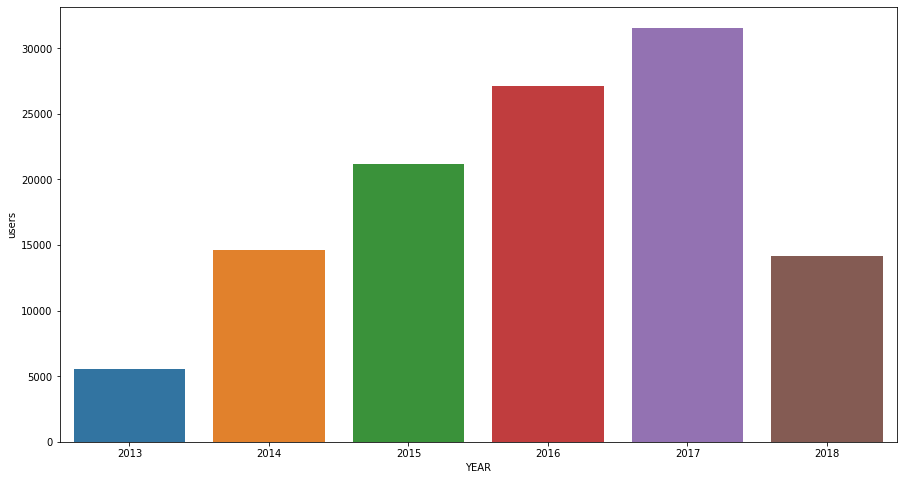

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=new_created_at, x='YEAR', y='users')

The graph above is the visualization for total users in each year. As we can see, **there is a decrease in the number of new users in 2018.**

In [ ]:
df_users.shape

(117178, 8)

### II.5.2. How many users do we lost overtime?

Upon looking the table there is a column named `deleted_at`, so there must be some users who had deleted their account. Therefore, I want to count the total of deleted users from 2013 to 2018.

In [ ]:
#Ceate a table containing the deleted users

deleted_at = sq('''
SELECT
  DATE(deleted_at) AS DAY,
  COUNT(DISTINCT id) AS deleted_users
FROM
  users
WHERE
  deleted_at IS NOT NULL
GROUP BY
  DAY
''')
deleted_at.head()

DAY  deleted_users
0  2013-05-13              1
1  2013-07-01              1
2  2013-07-13              1
3  2013-08-05              2
4  2013-08-08              1

In [ ]:
deleted_at['YEAR'] = pd.DatetimeIndex(deleted_at['DAY']).year
new_deleted_at = pd.DataFrame(deleted_at.groupby(['YEAR'], as_index=False).sum())
new_deleted_at

YEAR  deleted_users
0  2013             43
1  2014            300
2  2015            548
3  2016            725
4  2017            890
5  2018            382

As we can see from the table above, here is the total users that we have in each year throughout 2013 to 2018:

* 2013 : 43 users
* 2014 : 300 users
* 2015 : 548 users
* 2016 : 725 users
* 2017 : 890 users
* 2018 : 382 users

In [ ]:
aa = new_deleted_at['deleted_users'].sum()
print('We have {} deleted users from 2013 to 2018.'.format(aa))

We have 2888 deleted users from 2013 to 2018.


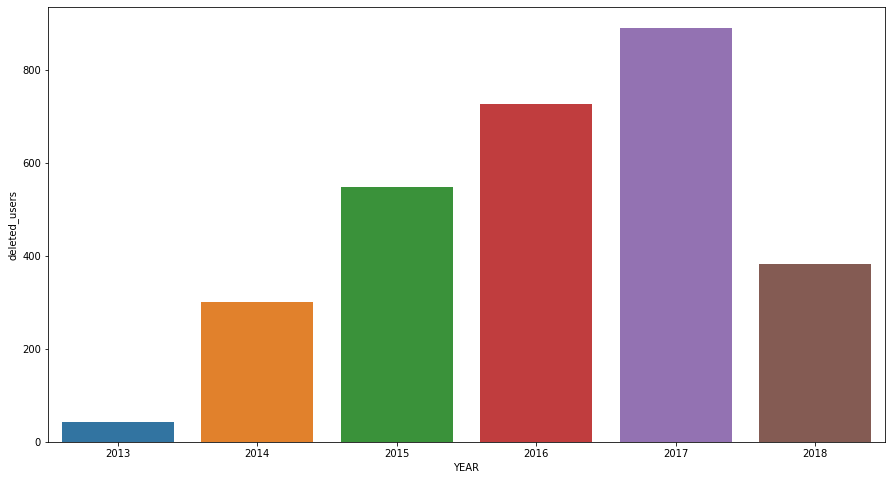

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=new_deleted_at, x='YEAR', y='deleted_users')

As we can see from the graph above, **2017 has the highest number of users who had deleted their account**.

So, if we sum the new users and deleted users, through 2013 to 2018 there 117178 users. The cell below is the total users (new users + deleted users)

In [ ]:
user_count = sq1('''
SELECT 
  COUNT(DISTINCT(id)) as user_count 
FROM 
  users
''').values[0][0]

print('We have {} users'.format(user_count))

We have 117178 users


### II.5.3. How many users have made a purchase?

Now, we should know how many users are buying the products.

In [ ]:
user_with_orders_count = sq1('''
SELECT COUNT(DISTINCT id) as number_of_users_who_have_made_purchases
FROM users u
INNER JOIN orders o
ON u.id = o.user_id
''').values[0][0]

print('We have {} users that have made purchases'.format(user_with_orders_count))

We have 17463 users that have made purchases


As it can be seen from above there are about 17 users that have made purchases.

In [ ]:
perc = user_with_orders_count/user_count*100

print('The percentage of users that have made purchases compared to total active users is {}%'.format(perc))

The percentage of users that have made purchases compared to total active users is 16.18989912782263%


If we compared to the total active users, only 16% of them are buying the products.

### II.5.4.
 How many orders that have been made from 2013 to 2018?

We now know that 16% of active users have made purchases, but how many orders that have been made from them in 2013 to 2018? To answer that question, we have to count the total of each unique invoice id from each orders.

In [ ]:
user_with_orders_count = sq1('''
SELECT COUNT(DISTINCT invoice_id) as number_of_invoice
FROM orders o
INNER JOIN users u
ON u.id = o.user_id
''').values[0][0]

print('We have {} orders from 2013 to 2018.'.format(user_with_orders_count))

We have 18971 orders from 2013 to 2018.


As it can be seen from above, there are 18971 orders from 2013 to 2018. This indicates that there are users who made purchases more than once.

### II.5.5. What is the the number for each event category?

Now, we move to analyze the event category. Upon looking in the dataset, there are 3 categories of events. There are `view_item`, `test_assignment`, and `view_user_profile`. Now the question is how many times each type of event occurs in the dataset and below is how to calculate it.

In [ ]:
event_name_count = sq1('''
SELECT
  event_name,
  count(*) AS event_count
FROM
  events
GROUP BY
  event_name
ORDER BY 
  event_count DESC
''')
event_name_count

Event Name  Event Count
0          view_item       525572
1    test_assignment       324980
2  view_user_profile         3088

As it can be seen from the above, the most event name with highest count is `view_item`, and the second is `test_assignment`. Now you may be wondering, what is `test_assignment`? And after we checked the data, `test_assignment` is an event carried out by the related e-commerce party to perform assignment testing using the server platform. And from this it also answers the question why from about 117 thousand users only 114 thousand active users and of those 114 thousand users only 16% make transactions. Here we assume that there are users created by e-commerce parties to test their system, maybe like their web or application.

In [ ]:
df_events[df_events['event_name'] == 'test_assignment']['platform'].value_counts()

server    324980
Name: platform, dtype: int64

As can be seen above that all `test_assignment` is done on the server platform.

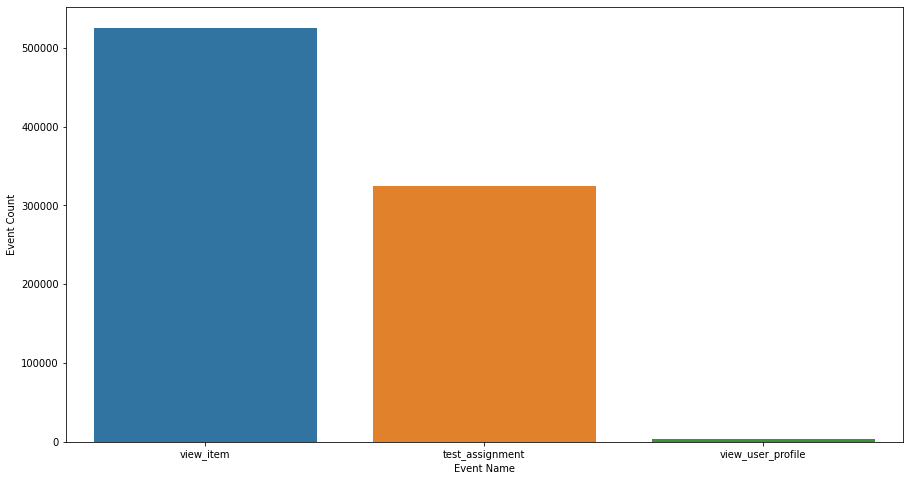

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=event_name_count, x='Event Name', y='Event Count')

The graph above is a graph that illustrates the number of counts for each event category where the view item is the category that has the highest count.

### II.5.6. What is the number of events for each Platform?

After we know the number of counts for each event category, now we will calculate the platform count used to carry out that event category

In [ ]:
events_platform_count = sq1('''
SELECT
  platform,
  count(*) AS platform_count
FROM
  events
GROUP BY
  platform
ORDER BY 
  platform_count DESC
''')
events_platform_count

Platform  Platform Count
0      server          324980
1         web          267421
2     android           87501
3  mobile web           87224
4         iOS           86514

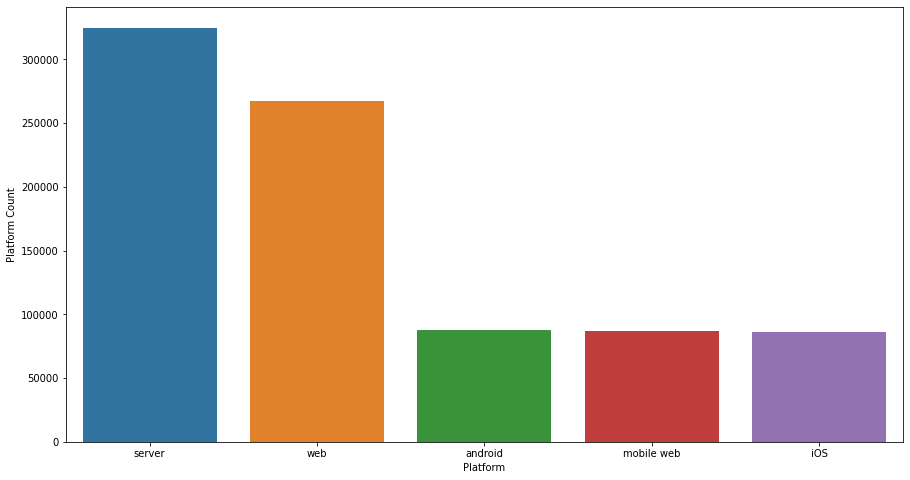

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=events_platform_count, x='Platform', y='Platform Count')

As can be seen in the graph above and as previously explained, the server platform is the most frequently used platform with context to perform test assignments. And based on the previous explanation, the view item is the category of event that is most often done, only the view item is done on several platforms so that it looks like the server platform is the platform that is most often used.

### II.5.7. How many item types are in each category?

Then next is the analysis of the data items. We will first count how many item categories this e-commerce company has, then we will also count how many item subtypes there are in each item type.

In [ ]:
items_for_sale = sq1('''
SELECT category,
       COUNT(DISTINCT id) AS item_count
FROM items
GROUP BY category
ORDER BY item_count DESC;
''')

items_for_sale

Category  Item Count
0   instrument         239
1       gadget         233
2       module         227
3    mechanism         225
4         tool         222
5       device         216
6       widget         212
7       dongle         211
8    apparatus         207
9  contraption         206

Below is the cell to plot how many item types and subtypes in each item types.

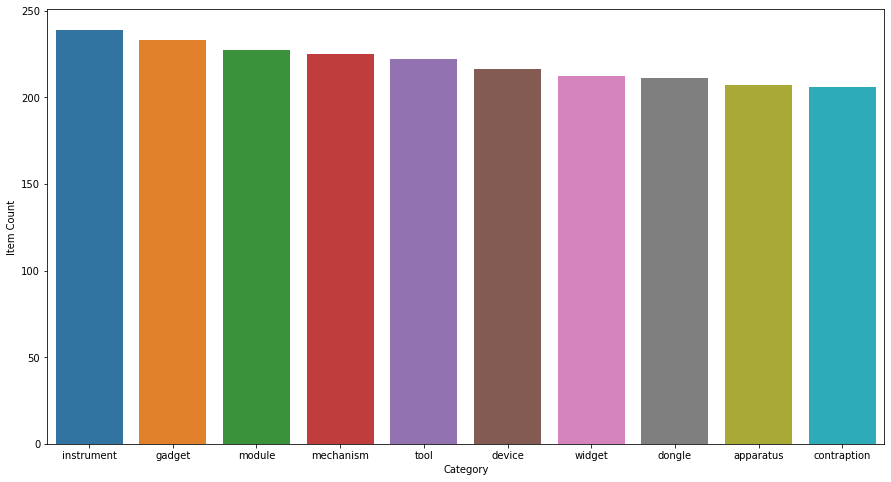

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=items_for_sale, x='Category', y='Item Count')

As can be seen in the graph above, the item type that has the most item subtypes is instrument item type and the most item type with the least item subtype is contraption. And when viewed from the graph, all item types have a number of item subtypes that are not much different, ranging from 239 to 206 item subtypes.

### II.5.8. How many email address for each email domains?

Then now we will count the number of email domains used by active users

In [ ]:
users = sq('''
SELECT * 
FROM users
''')

users.head()

created_at deleted_at               email_address first_name  \
0  2014-12-20 07:07:45       None  ArataHopper@earthlink.info      Arata   
1  2016-10-14 05:39:20       None    Riya_Gruber1974@mail.net       Riya   
2  2017-01-21 10:20:09       None      Peter_Sousa@yahoo.info      Peter   
3  2015-10-30 21:31:30       None    D_Kowalski1962@gmail.com          D   
4  2015-10-24 16:27:27       None         SNovak1966@mail.com          S   

         id last_name merged_at  parent_user_id  
0   51590.0    Hopper      None             NaN  
1  158891.0    Gruber      None             NaN  
2  179949.0     Sousa      None             NaN  
3   98000.0  Kowalski      None             NaN  
4   93994.0     Novak      None             NaN

In [ ]:
#lets see the types of email domains do we have
import numpy as np
e_mail_domains = np.unique(users['email_address'].apply(lambda x:re.findall('@[\w]+'.lower(),x.lower())[0][1:]))
print('We have {} E-Mail domains:\n{}'.format(len(e_mail_domains),e_mail_domains))

We have 6 E-Mail domains:
['earthlink' 'gmail' 'inbox' 'mail' 'outlook' 'yahoo']


As can be seen above, there are six email domains used by active users, namely earthlink, gmail, inbox, mail, outlook, yahoo.

And below is a cell to count how many users there are in each email domain

In [ ]:
email_domain_users_count = pd.DataFrame(columns=e_mail_domains)
for email in e_mail_domains:
    q = '''SELECT COUNT(*)
           FROM users 
           WHERE email_address like '{}' '''.format('%@'+email+'.%')
    count = sq(q).values[0]
    email_domain_users_count[email] = count
email_domain_users_count = email_domain_users_count.T.sort_values(by=0,ascending=False).reset_index().\
                                        rename(columns={0:'Domain users count','index':'Domain name'})
email_domain_users_count

Domain name  Domain users count
0       gmail               43854
1     outlook               14840
2       yahoo               14712
3       inbox               14657
4   earthlink               14579
5        mail               14536

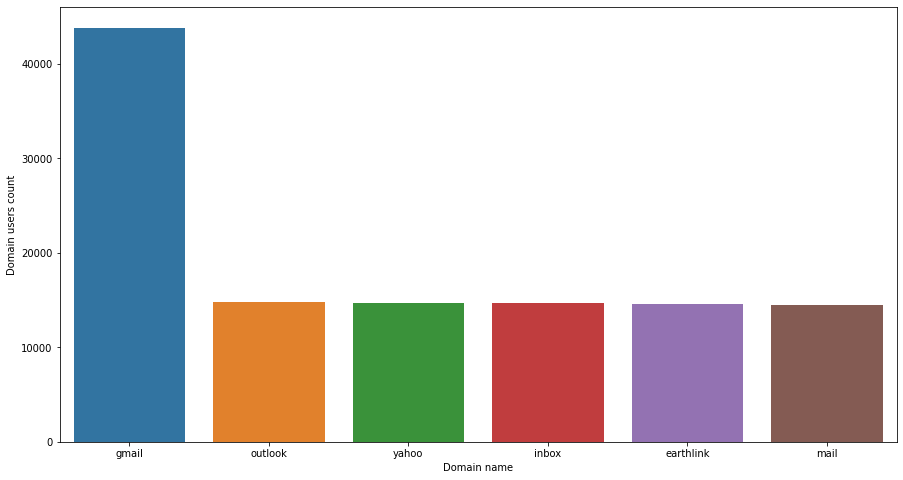

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=email_domain_users_count, x='Domain name', y='Domain users count')

As can be seen in the graph above, the gmail domain is the most common domain used by active users of this company's e-commerce. In fact, the gmail domain is the email domain most commonly used by the general public for personal account purposes.

### II.5.9. How many orders per item category?

Now, we are going to analyze about orders and the items.

In [ ]:
aaaa = sq1('''
SELECT
  category,
  count(*) AS orders_by_category
FROM
  orders
  LEFT JOIN items ON items.id = orders.item_id
GROUP BY
  category
ORDER BY
  orders_by_category DESC;
''')
aaaa

Category  Orders By Category
0    apparatus                4892
1       widget                4809
2       module                4800
3   instrument                4767
4       device                4735
5    mechanism                4706
6  contraption                4700
7       gadget                4695
8       dongle                4665
9         tool                4633

As it can be seen from above and as mentioned before there are 10 categories of items, each type / category of item has its own subtype. And based from the table above we have counted the total orders from each type of items. the number of orders for all types of items does not differ much, varies from 4800 to 4600 orders.  

### II.5.10. How many users have made purchases in each item category?

Then, how many users buy in each item category? To answer this question, we will calculate using the users table and also the orders table. Of the two we will use the `item_category`, `parent_user_id` and `user_id` columns.

In [ ]:
b = sq1('''
SELECT
  o.item_category AS category,
  COUNT(DISTINCT COALESCE(parent_user_id, user_id)) AS user_with_orders
FROM
  orders o
  JOIN users u ON u.id = o.user_id
GROUP BY
  o.item_category
ORDER BY
  user_with_orders DESC
''')
b

Category  User With Orders
0    apparatus              2028
1       widget              2015
2  contraption              2008
3       module              1999
4   instrument              1997
5       device              1994
6    mechanism              1981
7       gadget              1978
8         tool              1971
9       dongle              1963

And as can be seen above, the number of users who place orders in each category is not much different from around 2000 users to 1900 users.

In [ ]:
b['User With Orders'].sum()

19934

We have 17463 users that have made purchases and the total number of orders is 19934 orders. This indicates that there are users who make transactions more than 1 time.

### II.5.11. How many orders per items?

After finding out how many users placed orders for each item category, now we will find out how many orders there are for each item category using the items and orders table. We will use the `item_id`, `name`, `category`, `orders_count`, `invoice_id` fields. Here below is how.

In [ ]:
aaa = sq1('''
SELECT
  item_id,
  name,
  category,
  orders_count
FROM
  (
    SELECT
      item_id,
      count(invoice_id) orders_count
    FROM
      orders
    GROUP BY
      item_id
  ) AS orders
  LEFT JOIN items ON items.id = orders.item_id
ORDER BY
  Orders_Count DESC
''')
aaa

Item Id                                 Name    Category  Orders Count
0      3486.0           extra-strength tool opener        tool            40
1      1679.0              matte apparatus wrapper   apparatus            39
2      1119.0  rechargable apparatus carrying_case   apparatus            38
3      1812.0                analog gadget cleaner      gadget            37
4       730.0      organic apparatus carrying_case   apparatus            36
...       ...                                  ...         ...           ...
2193   3946.0   aerodynamic mechanism storage_unit   mechanism            10
2194   1034.0                    reflective dongle      dongle             9
2195   2677.0      organic instrument storage_unit  instrument             9
2196   2846.0   prize-winning gadget carrying_case      gadget             9
2197   3898.0                reflective instrument  instrument             9

[2198 rows x 4 columns]

According to the table above, the extra-strength tool opener has been ordered 40 times, the matte apparatus wrapper has been ordered 39 times, the rechargable apparatus carrying_case has been ordered 38 times and so on.

### II.5.12. What percent of users have viewed items for each product category?

Then now we will count how many times each item category has been seen by users by creating a new table, namely `view_item_events` where the table will contain `event_id`, `event_time`, `user_id`, `platform`, `item_id`, `referrer` from events table.

In [ ]:
view_item_events = c.execute('''
CREATE TABLE IF NOT EXISTS view_item_events AS
  SELECT
    event_id,
    DATE(event_time) AS event_time,
    user_id,
    platform,
    MAX(
      CASE
        WHEN parameter_name = 'item_id' THEN parameter_value
        ELSE NULL
      END
    ) AS item_id,
    MAX(
      CASE
        WHEN parameter_name = 'referrer' THEN parameter_value
        ELSE NULL
      END
    ) AS referrer
  FROM
    events
  WHERE
    event_name = 'view_item'
  GROUP BY
    event_id,
    event_time,
    user_id,
    platform
''')

In [ ]:
cat_users_viewed_count = sq1(''' 
WITH view_item_event_category_group AS (
  SELECT
    i.category AS category,
    v.user_id AS user_id
  FROM
    view_item_events v
    LEFT JOIN items i ON i.id = v.item_id
)
SELECT
  category,
  count(DISTINCT user_id) AS users_viewed_count
FROM
  view_item_event_category_group
GROUP BY
  category
''')

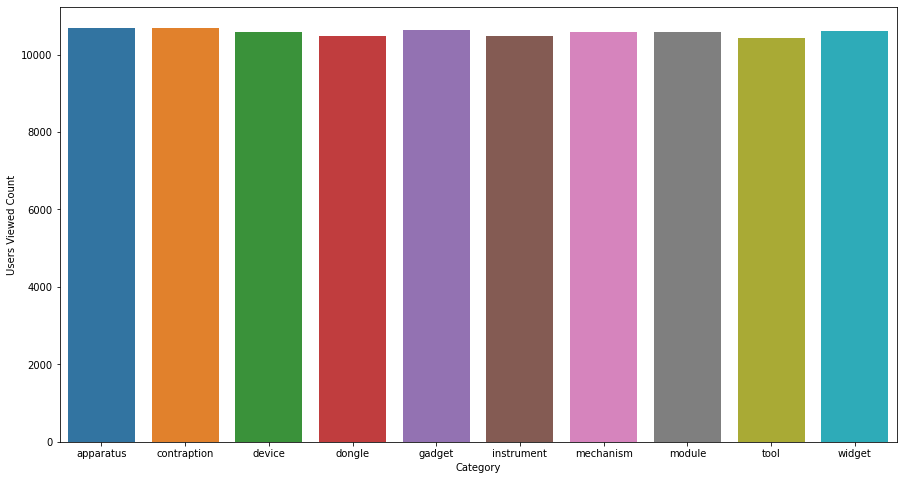

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cat_users_viewed_count, x='Category', y='Users Viewed Count')

It can be seen in the graph above, that each item category has a number of views that do not differ much. Each item category has about 10000 views.

### II.5.13. How many orders are placed each year?

Then now we will analyze how many orders there are in each year from 2014 to 2018.

In [ ]:
num_each_day = sq1('''
SELECT
  DATE(paid_at) AS DAY,
  COUNT(DISTINCT invoice_id) AS orders,
  COUNT(DISTINCT line_item_id) AS line_items
FROM
  orders
GROUP BY
  DAY
ORDER BY
  DAY DESC;
''')
num_each_day

Day  Orders  Line Items
0     2018-06-04       4          11
1     2018-06-03       6          15
2     2018-06-02       8          21
3     2018-06-01       8          17
4     2018-05-31      14          32
...          ...     ...         ...
1811  2013-04-13       1           1
1812  2013-04-07       1           3
1813  2013-03-29       1           3
1814  2013-03-27       1           1
1815  2013-03-14       1           2

[1816 rows x 3 columns]

In [ ]:
num_each_day['YEAR'] = pd.DatetimeIndex(num_each_day['Day']).year
num_each_day

Day  Orders  Line Items  YEAR
0     2018-06-04       4          11  2018
1     2018-06-03       6          15  2018
2     2018-06-02       8          21  2018
3     2018-06-01       8          17  2018
4     2018-05-31      14          32  2018
...          ...     ...         ...   ...
1811  2013-04-13       1           1  2013
1812  2013-04-07       1           3  2013
1813  2013-03-29       1           3  2013
1814  2013-03-27       1           1  2013
1815  2013-03-14       1           2  2013

[1816 rows x 4 columns]

In [ ]:
new_num_each_day = pd.DataFrame(num_each_day.groupby(['YEAR'], as_index=False)['Orders'].sum())


In [ ]:
new_num_each_day

YEAR  Orders
0  2013     545
1  2014    2253
2  2015    3580
3  2016    4675
4  2017    5414
5  2018    2504

In [ ]:
new_num_each_day['Orders'].sum()

18971

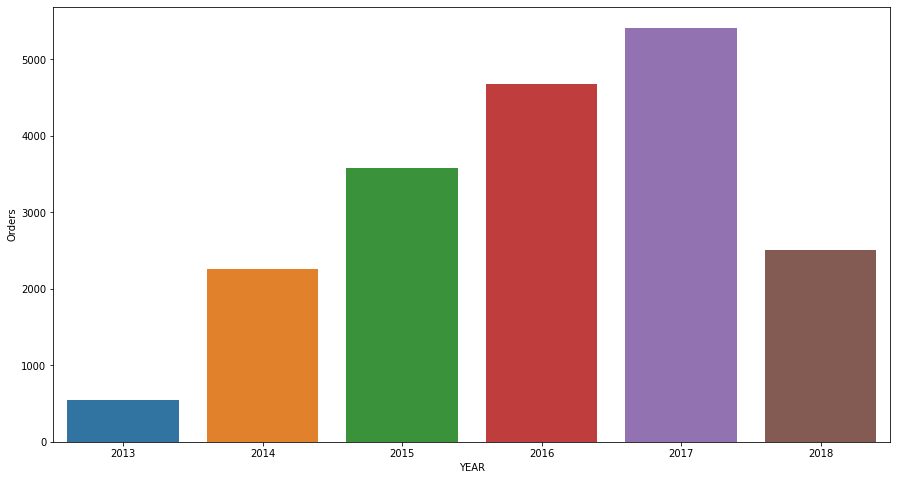

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=new_num_each_day, x='YEAR', y='Orders')

As can be seen in the graph above, 2013 was the year with the lowest number of orders. The year 2018 has a lower number of orders compared to 2015 - 2017 and this is because the amount of data in 2018 has not yet reached the end of 2018 so that the number of orders is still small compared to the previous 3 years.

### II.5.14. What is the most recently viewed item for each user?

Now we will try to see the most recently viewed items by users.

In [ ]:
#first lets create a table with recently viewed events for each user
recent_views = c.execute('''
CREATE TABLE IF NOT EXISTS 'recent_views' AS
SELECT
  user_id,
  item_id,
  event_time,
  ROW_NUMBER() OVER (
    PARTITION BY user_id
    ORDER BY
      event_time DESC
  ) AS row_number,
  RANK() OVER (
    PARTITION BY user_id
    ORDER BY
      event_time DESC
  ) AS rank,
  DENSE_RANK() OVER (
    PARTITION BY user_id
    ORDER BY
      event_time DESC
  ) AS dense_rank
FROM
  view_item_events
''')

In [ ]:
recent_views = sq('''SELECT * FROM recent_views''')

In [ ]:
c.execute('''
CREATE TABLE IF NOT EXISTS 'full_recent_view' AS
SELECT
  u.id AS user_id,
  (u.first_name || ' ' || u.last_name) AS name,
  i.id AS item_id,
  event_time,
  row_number,
  rank,
  dense_rank,
  u.created_at,
  i.category
FROM
  recent_views r
  LEFT JOIN users u ON r.user_id = u.id
  LEFT JOIN items i ON r.item_id = i.id
''')

In [ ]:
full_recent_view = sq('''SELECT * FROM full_recent_view ''')

In [ ]:
#now we need to get the needed information about the item they viewed more recently.
sq('''
SELECT u.id AS user_id,
  (u.first_name || ' ' || u.last_name) AS name,
  i.id AS item_id,
  i.name AS item_name,
  event_time,
  row_number,
  u.created_at,
  i.category
from full_recent_view r
JOIN users u
  ON u.id = r.user_id
JOIN items i
  ON i.id = r.item_id
''')

user_id           name  item_id                      item_name  \
0            4.0       L Murphy   3924.0   organic device how-to-manual   
1            4.0       L Murphy   2712.0       miniature dongle wrapper   
2            4.0       L Murphy   2248.0                  dongle warmer   
3            8.0  Hanah Schmidt   2430.0                  gadget refill   
4            8.0  Hanah Schmidt   2079.0            gadget storage_unit   
...          ...            ...      ...                            ...   
262781  298552.0     I Sargsyan    275.0             aerodynamic gadget   
262782  298817.0       S Miller    931.0       miniature device cleaner   
262783  298817.0       S Miller   3806.0   extra-strength device opener   
262784  298817.0       S Miller    755.0  extra-strength device wrapper   
262785  298832.0    Rebecca Kim    955.0      aerodynamic gadget opener   

        event_time  row_number           created_at category  
0       2013-09-04           1  2013-03-04 00:06:49   device  
1       2013-07-05           2  2013-03-04 00:06:49   dongle  
2       2013-07-03           3  2013-03-04 00:06:49   dongle  
3       2013-07-26           1  2013-02-18 22:10:23   gadget  
4       2013-07-25           2  2013-02-18 22:10:23   gadget  
...            ...         ...                  ...      ...  
262781  2018-06-01           1  2018-05-24 21:34:56   gadget  
262782  2018-05-28           1  2018-05-29 21:21:09   device  
262783  2018-05-26           2  2018-05-29 21:21:09   device  
262784  2018-05-26           3  2018-05-29 21:21:09   device  
262785  2018-05-28           1  2018-05-28 22:56:01   gadget  

[262786 rows x 8 columns]

In [ ]:
#now select the most recently viewed for each user(row_view = 1)
c.execute('''
CREATE TABLE IF NOT EXISTS 'recent_view_user' AS
SELECT
  COALESCE(users.parent_user_id, users.id) AS user_id,
  (users.first_name || ' ' || users.last_name) AS name,
  items.id AS item_id,
  items.name AS item_name,
  event_time,
  users.created_at,
  items.category
FROM
  full_recent_view
  JOIN users ON users.id = full_recent_view.user_id
  JOIN items ON items.id = full_recent_view.item_id
  LEFT JOIN orders
  /*LEFT OUTER JOIN to filter the users who viewed and ordered*/
  ON orders.item_id = full_recent_view.item_id
  AND orders.user_id = full_recent_view.user_id
WHERE
  row_number = 1
  AND users.deleted_at IS NOT NULL
  AND orders.item_id IS NULL
''')

Below is a table result showing the last seen items by users.

In [ ]:
sq('''
SELECT * FROM recent_view_user 
''')

user_id             name  item_id  \
0     193669.0   Mary Scientist   2198.0   
1     214268.0   Santiago Brown   2659.0   
2       1033.0       Riya Anand   3271.0   
3       8442.0         R Wilson   3863.0   
4       1209.0         S Kruger    334.0   
...        ...              ...      ...   
1468  273346.0  Katherine Adams   3016.0   
1469  276409.0       Noah Ahmad   2410.0   
1470  278739.0      A Rodriquez   2002.0   
1471  283645.0         Lisa Kim   2469.0   
1472  283778.0   Felipe Mueller   2516.0   

                                    item_name  event_time  \
0                          aerodynamic gadget  2013-10-09   
1               matte instrument storage_unit  2013-04-04   
2                 miniature instrument refill  2013-08-11   
3                        fuzzy widget cleaner  2013-09-01   
4                      digital widget cleaner  2013-09-28   
...                                       ...         ...   
1468                    glossy dongle wrapper  2018-03-27   
1469                    miniature tool warmer  2018-05-08   
1470                         analog mechanism  2018-04-24   
1471  industrial-strength contraption charger  2018-04-21   
1472            analog apparatus storage_unit  2018-05-28   

               created_at     category  
0     2013-03-25 00:30:21       gadget  
1     2013-03-30 01:20:12   instrument  
2     2013-04-21 00:12:36   instrument  
3     2013-05-04 02:39:12       widget  
4     2013-04-28 10:16:16       widget  
...                   ...          ...  
1468  2018-02-22 08:37:47       dongle  
1469  2018-03-02 17:48:03         tool  
1470  2018-03-28 14:36:26    mechanism  
1471  2018-04-10 21:25:39  contraption  
1472  2018-04-05 09:50:24    apparatus  

[1473 rows x 7 columns]

### II.5.15. How many users have reordered an item?

Since in the previous section we mentioned that there are users who place orders more than once, now we will count how many users place orders more than once. Here below is how.

In [ ]:
sq1('''
SELECT COUNT(DISTINCT user_id) as users_re_ordered
FROM
  ( SELECT user_id,
           COUNT(DISTINCT invoice_id) AS order_count
   FROM orders
   GROUP BY user_id ) user_level
WHERE order_count > 1;
''')

Users Re Ordered
0              1421

Based on the calculation results above, there are 1421 users who order more than 1 time.

### II.5.16. How many users have reordered the same item?

Then are there users who order the same items more than once? Here below is a way to calculate it using the orders table.

In [ ]:
sq1('''
SELECT
  COUNT(*) as re_order_the_same_item
FROM
  (
    SELECT
      user_id,
      item_id,
      COUNT (DISTINCT line_item_id) AS times_user_ordered
    FROM
      orders
    GROUP BY
      user_id,
      item_id
  )
WHERE
  times_user_ordered > 1;
''')

Re Order The Same Item
0                     211

And based on the calculation results above, there are 211 users who ordered the same item more than once.

# III. Customer Segmentation

## III.1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as pl
from scipy import stats

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

from feature_engine.outliers import Winsorizer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## III.2. Data Loading

In [ ]:
df_events = pd.read_csv("dsv1069_events.csv")
df_items = pd.read_csv("dsv1069_items.csv")
df_orders = pd.read_csv("dsv1069_orders.csv")
df_users = pd.read_csv("dsv1069_users.csv")

C:\Users\mahes\AppData\Local\Temp\ipykernel_15488\2536878048.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_events = pd.read_csv("dsv1069_events.csv")


In [ ]:
df_events.head()

event_id           event_time   user_id event_name  \
0  b9de71c5c3cc4cd7a97e50b832106e5a  2017-06-26 11:23:39  178481.0  view_item   
1  23267713c9ea44419331731f50b6a8db  2017-06-27 10:46:39  178481.0  view_item   
2  1b7822fa7b854e01970218ae8f721fe0  2017-06-27 11:15:39  178481.0  view_item   
3  2a7a188a626841ac94befcc419f06af4  2016-10-05 20:43:10  154133.0  view_item   
4  631d657264cc4616a4528f759509b25d  2016-10-04 03:29:10  154133.0  view_item   

  platform parameter_name parameter_value  
0  android        item_id            3526  
1  android        item_id            1514  
2  android        item_id            3712  
3  android        item_id            3586  
4  android        item_id            1061

events table will not be used for RFM analysis

In [ ]:
df_items.head()

adjective     category           created_at      id  \
0                fuzzy  contraption  2014-01-15 21:36:09  2512.0   
1                  NaN   instrument  2013-05-14 05:20:50   482.0   
2  industrial-strength       module  2014-02-04 19:28:32  2446.0   
3              digital         tool  2013-02-25 12:23:18  1312.0   
4            miniature       device  2013-08-05 17:20:45  3556.0   

        modifier                             name  price  
0  carrying_case  fuzzy contraption carrying_case  150.0  
1         refill                instrument refill   35.2  
2            NaN       industrial-strength module  300.0  
3  carrying_case       digital tool carrying_case   16.5  
4        cleaner         miniature device cleaner   16.5

items table will not be used for RFM analysis

In [ ]:
df_orders.head()

invoice_id  line_item_id   user_id  item_id  \
0    192320.0       83118.0  178481.0   3526.0   
1    192320.0      207309.0  178481.0   1514.0   
2    192320.0      392027.0  178481.0   3712.0   
3     80902.0      243831.0  154133.0   3586.0   
4     80902.0      399806.0  154133.0   1061.0   

                           item_name item_category  price  \
0                  digital apparatus     apparatus  330.0   
1        miniature apparatus cleaner     apparatus   99.0   
2        miniature apparatus cleaner     apparatus   99.0   
3              reflective instrument    instrument   57.2   
4  extra-strength instrument charger    instrument   17.6   

            created_at              paid_at  
0  2017-06-28 21:14:25  2017-06-27 21:19:39  
1  2017-06-28 21:14:25  2017-06-27 21:19:39  
2  2017-06-28 21:14:25  2017-06-27 21:19:39  
3  2016-10-09 06:57:30  2016-10-07 10:08:10  
4  2016-10-09 06:57:30  2016-10-07 10:08:10

* invoice_id can be used to find total order, 
* user_id for unique id,
* item_id can be used to find total item bought, 
* price for monetary value 
* paid_at for latest transaction

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47402 entries, 0 to 47401
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_id     47402 non-null  float64
 1   line_item_id   47402 non-null  float64
 2   user_id        47402 non-null  float64
 3   item_id        47402 non-null  float64
 4   item_name      47402 non-null  object 
 5   item_category  47402 non-null  object 
 6   price          47402 non-null  float64
 7   created_at     47402 non-null  object 
 8   paid_at        47402 non-null  object 
dtypes: float64(5), object(4)
memory usage: 3.3+ MB


created_at and paid_at are still object, will be converted to datetime later

In [ ]:
df_users.head()

created_at deleted_at               email_address first_name  \
0  2014-12-20 07:07:45        NaN  ArataHopper@earthlink.info      Arata   
1  2016-10-14 05:39:20        NaN    Riya_Gruber1974@mail.net       Riya   
2  2017-01-21 10:20:09        NaN      Peter_Sousa@yahoo.info      Peter   
3  2015-10-30 21:31:30        NaN    D_Kowalski1962@gmail.com          D   
4  2015-10-24 16:27:27        NaN         SNovak1966@mail.com          S   

         id last_name merged_at  parent_user_id  
0   51590.0    Hopper       NaN             NaN  
1  158891.0    Gruber       NaN             NaN  
2  179949.0     Sousa       NaN             NaN  
3   98000.0  Kowalski       NaN             NaN  
4   93994.0     Novak       NaN             NaN

* created_at can be used to find when was the id created

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117178 entries, 0 to 117177
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   created_at      117178 non-null  object 
 1   deleted_at      2888 non-null    object 
 2   email_address   117178 non-null  object 
 3   first_name      117178 non-null  object 
 4   id              117178 non-null  float64
 5   last_name       117178 non-null  object 
 6   merged_at       6408 non-null    object 
 7   parent_user_id  6408 non-null    float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


created at will be converted to datetime

## III.3. RFM Analysis

In this RFM analysis we will be doing the following:
* Recency: calculate the length in terms of days, between latest date and last purchase of a customer
* Frequency: calculate the amount of invoice for each customer
* Monetary: calculate the total amount of money spent from a customer
* Length: calculate the total days between the creation of the ID and the latest order of the ID

### III.3.1. Merge Orders and Users

In [ ]:
# merge users and orders
new_df = df_orders.merge(df_users,how='inner',left_on="user_id",right_on='id',suffixes=('_orders', '_users'))
new_df

invoice_id  line_item_id   user_id  item_id  \
0        192320.0       83118.0  178481.0   3526.0   
1        192320.0      207309.0  178481.0   1514.0   
2        192320.0      392027.0  178481.0   3712.0   
3         80902.0      243831.0  154133.0   3586.0   
4         80902.0      399806.0  154133.0   1061.0   
...           ...           ...       ...      ...   
47397     92108.0      236314.0  230808.0   1677.0   
47398    348144.0      162528.0  151538.0   3729.0   
47399    348144.0      321219.0  151538.0   1645.0   
47400    348144.0      264112.0  151538.0   2084.0   
47401    348144.0       58354.0  151538.0   2681.0   

                               item_name item_category    price  \
0                      digital apparatus     apparatus  330.000   
1            miniature apparatus cleaner     apparatus   99.000   
2            miniature apparatus cleaner     apparatus   99.000   
3                  reflective instrument    instrument   57.200   
4      extra-strength instrument charger    instrument   17.600   
...                                  ...           ...      ...   
47397                 rechargable widget        widget    3.900   
47398       prize-winning gadget wrapper        gadget   39.160   
47399       digital gadget carrying_case        gadget   58.740   
47400          matte gadget storage_unit        gadget  278.125   
47401             digital gadget charger        gadget   19.580   

         created_at_orders              paid_at     created_at_users  \
0      2017-06-28 21:14:25  2017-06-27 21:19:39  2017-01-02 04:17:55   
1      2017-06-28 21:14:25  2017-06-27 21:19:39  2017-01-02 04:17:55   
2      2017-06-28 21:14:25  2017-06-27 21:19:39  2017-01-02 04:17:55   
3      2016-10-09 06:57:30  2016-10-07 10:08:10  2016-09-09 05:30:45   
4      2016-10-09 06:57:30  2016-10-07 10:08:10  2016-09-09 05:30:45   
...                    ...                  ...                  ...   
47397  2017-12-04 19:01:55  2017-12-05 03:00:14  2017-09-13 08:59:57   
47398  2016-11-18 21:00:07  2016-11-18 14:19:52  2016-09-01 22:55:04   
47399  2016-11-18 21:00:07  2016-11-18 14:19:52  2016-09-01 22:55:04   
47400  2016-11-18 21:00:07  2016-11-18 14:19:52  2016-09-01 22:55:04   
47401  2016-11-18 21:00:07  2016-11-18 14:19:52  2016-09-01 22:55:04   

      deleted_at              email_address first_name        id  last_name  \
0            NaN       ADavis1973@gmail.edu          A  178481.0      Davis   
1            NaN       ADavis1973@gmail.edu          A  178481.0      Davis   
2            NaN       ADavis1973@gmail.edu          A  178481.0      Davis   
3            NaN    Anne_Davis1985@mail.edu       Anne  154133.0      Davis   
4            NaN    Anne_Davis1985@mail.edu       Anne  154133.0      Davis   
...          ...                        ...        ...       ...        ...   
47397        NaN  LisaRodriquez@outlook.edu       Lisa  230808.0  Rodriquez   
47398        NaN      Lisa_Santos@yahoo.net       Lisa  151538.0     Santos   
47399        NaN      Lisa_Santos@yahoo.net       Lisa  151538.0     Santos   
47400        NaN      Lisa_Santos@yahoo.net       Lisa  151538.0     Santos   
47401        NaN      Lisa_Santos@yahoo.net       Lisa  151538.0     Santos   

      merged_at  parent_user_id  
0           NaN             NaN  
1           NaN             NaN  
2           NaN             NaN  
3           NaN             NaN  
4           NaN             NaN  
...         ...             ...  
47397       NaN             NaN  
47398       NaN             NaN  
47399       NaN             NaN  
47400       NaN             NaN  
47401       NaN             NaN  

[47402 rows x 17 columns]

### III.3*.2*. Drop Unused Columns

In [ ]:
# dropping unused columns
new_df.drop(['deleted_at','email_address','first_name','last_name','merged_at','parent_user_id','id','item_name','item_category','line_item_id','created_at_orders'],axis=1,inplace=True)
new_df

invoice_id   user_id  item_id    price              paid_at  \
0        192320.0  178481.0   3526.0  330.000  2017-06-27 21:19:39   
1        192320.0  178481.0   1514.0   99.000  2017-06-27 21:19:39   
2        192320.0  178481.0   3712.0   99.000  2017-06-27 21:19:39   
3         80902.0  154133.0   3586.0   57.200  2016-10-07 10:08:10   
4         80902.0  154133.0   1061.0   17.600  2016-10-07 10:08:10   
...           ...       ...      ...      ...                  ...   
47397     92108.0  230808.0   1677.0    3.900  2017-12-05 03:00:14   
47398    348144.0  151538.0   3729.0   39.160  2016-11-18 14:19:52   
47399    348144.0  151538.0   1645.0   58.740  2016-11-18 14:19:52   
47400    348144.0  151538.0   2084.0  278.125  2016-11-18 14:19:52   
47401    348144.0  151538.0   2681.0   19.580  2016-11-18 14:19:52   

          created_at_users  
0      2017-01-02 04:17:55  
1      2017-01-02 04:17:55  
2      2017-01-02 04:17:55  
3      2016-09-09 05:30:45  
4      2016-09-09 05:30:45  
...                    ...  
47397  2017-09-13 08:59:57  
47398  2016-09-01 22:55:04  
47399  2016-09-01 22:55:04  
47400  2016-09-01 22:55:04  
47401  2016-09-01 22:55:04  

[47402 rows x 6 columns]

### III.3.3. To Datetime

In [ ]:
new_df['paid_at'] = pd.to_datetime(new_df['paid_at'])
new_df['created_at_users'] = pd.to_datetime(new_df['created_at_users'])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47402 entries, 0 to 47401
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   invoice_id        47402 non-null  float64       
 1   user_id           47402 non-null  float64       
 2   item_id           47402 non-null  float64       
 3   price             47402 non-null  float64       
 4   paid_at           47402 non-null  datetime64[ns]
 5   created_at_users  47402 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.5 MB


### III.3.4. Group By Invoice ID

Grouping by invoice first so that we will not have duplicate invoice later on

In [ ]:
# groupby id and agregate other columns
df_agg = new_df.groupby('invoice_id',
            as_index=False).agg(user_id=('user_id',np.max),
                                total_price=('price',np.sum),
                                paid_at=('paid_at',np.max),
                                created_at=('created_at_users',np.min)
                                )
df_agg

invoice_id   user_id  total_price             paid_at  \
0             6.0   89601.0       143.00 2016-03-13 18:38:19   
1            20.0   50878.0       177.22 2015-03-25 03:11:09   
2            30.0   69737.0         0.00 2015-11-08 15:07:15   
3            64.0  139762.0        15.75 2016-12-30 03:33:16   
4            98.0   11072.0       178.64 2014-05-02 03:58:15   
...           ...       ...          ...                 ...   
18966    399938.0  252227.0       300.00 2018-03-13 11:46:58   
18967    399943.0  201699.0      1080.00 2017-05-19 01:51:42   
18968    399960.0   86432.0       105.60 2016-01-30 16:14:37   
18969    399979.0  198052.0        32.04 2017-08-24 11:23:24   
18970    399995.0   64746.0         3.30 2015-08-15 23:53:53   

               created_at  
0     2015-09-14 14:21:56  
1     2014-12-29 08:52:28  
2     2015-05-06 04:36:50  
3     2016-06-20 14:16:04  
4     2013-11-14 14:23:26  
...                   ...  
18966 2017-11-26 22:36:14  
18967 2017-04-23 13:31:26  
18968 2015-08-25 04:06:27  
18969 2017-04-23 08:00:06  
18970 2015-04-01 17:35:45  

[18971 rows x 5 columns]

In [ ]:
# counting total item to find the amount of item bought per invoice
total_item = new_df.groupby(['invoice_id'],as_index=False)['item_id'].count()
total_item.rename(columns={'item_id':'total_items'},inplace=True)
total_item.sort_values(by='total_items',ascending=True)

invoice_id  total_items
0             6.0            1
8807     185759.0            1
8806     185747.0            1
8804     185713.0            1
8800     185642.0            1
...           ...          ...
3259      69305.0            4
3258      69297.0            4
13603    286959.0            4
13600    286912.0            4
14147    298778.0            4

[18971 rows x 2 columns]

In [ ]:
# merging
by_invoice = df_agg.merge(total_item,how='inner',left_on='invoice_id',right_on='invoice_id')
by_invoice

invoice_id   user_id  total_price             paid_at  \
0             6.0   89601.0       143.00 2016-03-13 18:38:19   
1            20.0   50878.0       177.22 2015-03-25 03:11:09   
2            30.0   69737.0         0.00 2015-11-08 15:07:15   
3            64.0  139762.0        15.75 2016-12-30 03:33:16   
4            98.0   11072.0       178.64 2014-05-02 03:58:15   
...           ...       ...          ...                 ...   
18966    399938.0  252227.0       300.00 2018-03-13 11:46:58   
18967    399943.0  201699.0      1080.00 2017-05-19 01:51:42   
18968    399960.0   86432.0       105.60 2016-01-30 16:14:37   
18969    399979.0  198052.0        32.04 2017-08-24 11:23:24   
18970    399995.0   64746.0         3.30 2015-08-15 23:53:53   

               created_at  total_items  
0     2015-09-14 14:21:56            1  
1     2014-12-29 08:52:28            3  
2     2015-05-06 04:36:50            1  
3     2016-06-20 14:16:04            2  
4     2013-11-14 14:23:26            4  
...                   ...          ...  
18966 2017-11-26 22:36:14            1  
18967 2017-04-23 13:31:26            3  
18968 2015-08-25 04:06:27            3  
18969 2017-04-23 08:00:06            1  
18970 2015-04-01 17:35:45            1  

[18971 rows x 6 columns]

### III.3.5. Group By User ID (Frequency and Monetary)

Counting the invoice per user id to find the Frequency and summing the total price per user id to find the monetary value. changed paid_at to last_order to represent the last date a user made a purchase

In [ ]:
# grouping by ID to find Monetary value
by_id = by_invoice.groupby('user_id',as_index=False).agg(
                                Monetary=('total_price',np.sum),
                                last_order=('paid_at',np.max),
                                created_at=('created_at',np.min),
                                Amount=('total_items',np.sum)
                                )
by_id

user_id  Monetary          last_order          created_at  Amount
0          17.0    243.00 2013-05-25 08:27:17 2013-03-03 02:42:42       3
1          25.0      1.80 2013-05-17 03:11:48 2013-03-06 16:01:06       2
2          63.0    585.00 2013-07-07 11:26:45 2013-03-12 16:34:26       3
3          65.0     44.50 2013-05-09 10:22:58 2013-03-08 01:55:17       1
4          69.0      9.42 2013-08-09 23:25:51 2013-02-25 01:26:18       4
...         ...       ...                 ...                 ...     ...
17458  295368.0     45.00 2018-06-01 09:27:57 2018-05-16 20:53:54       1
17459  296332.0      4.65 2018-05-29 22:55:55 2018-05-19 14:15:06       2
17460  296584.0      8.82 2018-06-02 15:15:39 2018-05-17 21:27:18       4
17461  296887.0    144.00 2018-05-29 15:02:38 2018-05-20 06:09:25       4
17462  296956.0    270.56 2018-05-31 09:35:26 2018-05-26 07:39:49       4

[17463 rows x 5 columns]

In [ ]:
# counting invoice_id
frequency = by_invoice.groupby('user_id',as_index=False)['invoice_id'].count()
frequency.rename(columns={'invoice_id':'Frequency'},inplace=True)
frequency.sort_values(by='Frequency', ascending=True)

user_id  Frequency
0          17.0          1
11403  176297.0          1
11404  176323.0          1
11405  176325.0          1
11406  176373.0          1
...         ...        ...
12290  191026.0          4
15058  234728.0          4
11763  182241.0          4
5717    88724.0          4
6505   100501.0          4

[17463 rows x 2 columns]

In [ ]:
# merging monetary and frequency
df_frequency = by_id.merge(frequency,how='inner',left_on='user_id',right_on='user_id')
df_frequency

user_id  Monetary          last_order          created_at  Amount  \
0          17.0    243.00 2013-05-25 08:27:17 2013-03-03 02:42:42       3   
1          25.0      1.80 2013-05-17 03:11:48 2013-03-06 16:01:06       2   
2          63.0    585.00 2013-07-07 11:26:45 2013-03-12 16:34:26       3   
3          65.0     44.50 2013-05-09 10:22:58 2013-03-08 01:55:17       1   
4          69.0      9.42 2013-08-09 23:25:51 2013-02-25 01:26:18       4   
...         ...       ...                 ...                 ...     ...   
17458  295368.0     45.00 2018-06-01 09:27:57 2018-05-16 20:53:54       1   
17459  296332.0      4.65 2018-05-29 22:55:55 2018-05-19 14:15:06       2   
17460  296584.0      8.82 2018-06-02 15:15:39 2018-05-17 21:27:18       4   
17461  296887.0    144.00 2018-05-29 15:02:38 2018-05-20 06:09:25       4   
17462  296956.0    270.56 2018-05-31 09:35:26 2018-05-26 07:39:49       4   

       Frequency  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
17458          1  
17459          1  
17460          1  
17461          1  
17462          1  

[17463 rows x 6 columns]

### III.3.6. Recency

We will be finding recency by subtracting latest overall date by last_order

In [ ]:
# remove timestamp
df_frequency['last_order'] = df_frequency['last_order'].dt.date
df_frequency['created_at'] = df_frequency['created_at'].dt.date
df_frequency

user_id  Monetary  last_order  created_at  Amount  Frequency
0          17.0    243.00  2013-05-25  2013-03-03       3          1
1          25.0      1.80  2013-05-17  2013-03-06       2          1
2          63.0    585.00  2013-07-07  2013-03-12       3          1
3          65.0     44.50  2013-05-09  2013-03-08       1          1
4          69.0      9.42  2013-08-09  2013-02-25       4          1
...         ...       ...         ...         ...     ...        ...
17458  295368.0     45.00  2018-06-01  2018-05-16       1          1
17459  296332.0      4.65  2018-05-29  2018-05-19       2          1
17460  296584.0      8.82  2018-06-02  2018-05-17       4          1
17461  296887.0    144.00  2018-05-29  2018-05-20       4          1
17462  296956.0    270.56  2018-05-31  2018-05-26       4          1

[17463 rows x 6 columns]

In [ ]:
# calculating latest purchase
MyList = []
for i in range(len(df_frequency)):
    recent = df_frequency['last_order'].max() - df_frequency['last_order'][i]
    MyList.append(recent)

In [ ]:
# df with recency
recency = pd.DataFrame(MyList,columns=["Recency"])
df_recency = pd.concat([df_frequency,recency],axis=1)
df_recency

user_id  Monetary  last_order  created_at  Amount  Frequency   Recency
0          17.0    243.00  2013-05-25  2013-03-03       3          1 1836 days
1          25.0      1.80  2013-05-17  2013-03-06       2          1 1844 days
2          63.0    585.00  2013-07-07  2013-03-12       3          1 1793 days
3          65.0     44.50  2013-05-09  2013-03-08       1          1 1852 days
4          69.0      9.42  2013-08-09  2013-02-25       4          1 1760 days
...         ...       ...         ...         ...     ...        ...       ...
17458  295368.0     45.00  2018-06-01  2018-05-16       1          1    3 days
17459  296332.0      4.65  2018-05-29  2018-05-19       2          1    6 days
17460  296584.0      8.82  2018-06-02  2018-05-17       4          1    2 days
17461  296887.0    144.00  2018-05-29  2018-05-20       4          1    6 days
17462  296956.0    270.56  2018-05-31  2018-05-26       4          1    4 days

[17463 rows x 7 columns]

### III.3.7. Length

In [ ]:
# calculating total days as customer
MyList2 = []
for i in range(len(df_recency)):
    days = df_recency['last_order'][i] - df_recency['created_at'][i]
    MyList2.append(days)

In [ ]:
length = pd.DataFrame(MyList2,columns=["Length"])
length

Length
0      83 days
1      72 days
2     117 days
3      62 days
4     165 days
...        ...
17458  16 days
17459  10 days
17460  16 days
17461   9 days
17462   5 days

[17463 rows x 1 columns]

In [ ]:
# concating length with main dataframe
df_length = pd.concat([df_recency,length],axis=1)
df_length

user_id  Monetary  last_order  created_at  Amount  Frequency  \
0          17.0    243.00  2013-05-25  2013-03-03       3          1   
1          25.0      1.80  2013-05-17  2013-03-06       2          1   
2          63.0    585.00  2013-07-07  2013-03-12       3          1   
3          65.0     44.50  2013-05-09  2013-03-08       1          1   
4          69.0      9.42  2013-08-09  2013-02-25       4          1   
...         ...       ...         ...         ...     ...        ...   
17458  295368.0     45.00  2018-06-01  2018-05-16       1          1   
17459  296332.0      4.65  2018-05-29  2018-05-19       2          1   
17460  296584.0      8.82  2018-06-02  2018-05-17       4          1   
17461  296887.0    144.00  2018-05-29  2018-05-20       4          1   
17462  296956.0    270.56  2018-05-31  2018-05-26       4          1   

        Recency   Length  
0     1836 days  83 days  
1     1844 days  72 days  
2     1793 days 117 days  
3     1852 days  62 days  
4     1760 days 165 days  
...         ...      ...  
17458    3 days  16 days  
17459    6 days  10 days  
17460    2 days  16 days  
17461    6 days   9 days  
17462    4 days   5 days  

[17463 rows x 8 columns]

### III.3.8. RFM Table

In [ ]:
# RFM table with user_id
df_RFM = df_length[['user_id','Recency','Frequency','Monetary','Length']]
df_RFM

user_id   Recency  Frequency  Monetary   Length
0          17.0 1836 days          1    243.00  83 days
1          25.0 1844 days          1      1.80  72 days
2          63.0 1793 days          1    585.00 117 days
3          65.0 1852 days          1     44.50  62 days
4          69.0 1760 days          1      9.42 165 days
...         ...       ...        ...       ...      ...
17458  295368.0    3 days          1     45.00  16 days
17459  296332.0    6 days          1      4.65  10 days
17460  296584.0    2 days          1      8.82  16 days
17461  296887.0    6 days          1    144.00   9 days
17462  296956.0    4 days          1    270.56   5 days

[17463 rows x 5 columns]

In [ ]:
df_RFM.isna().sum()

user_id      0
Recency      0
Frequency    0
Monetary     0
Length       0
dtype: int64

### III.3.9. RFM EDA

In [ ]:
df_RFM[['Recency','Frequency','Monetary','Length']].describe()

Recency     Frequency      Monetary  \
count                        17463  17463.000000  17463.000000   
mean   688 days 19:58:23.521731656      1.086354    276.381676   
std    462 days 06:41:08.242346496      0.299063    383.592673   
min                0 days 00:00:00      1.000000      0.000000   
25%              293 days 00:00:00      1.000000     43.200000   
50%              629 days 00:00:00      1.000000    126.000000   
75%             1035 days 00:00:00      1.000000    338.280000   
max             1908 days 00:00:00      4.000000   4027.500000   

                            Length  
count                        17463  
mean   100 days 14:15:11.595945714  
std     58 days 05:54:31.621686840  
min              -3 days +00:00:00  
25%               50 days 00:00:00  
50%              100 days 00:00:00  
75%              151 days 00:00:00  
max              205 days 00:00:00

We will be doing manual scoring/ranking of the RFML by using quantiles. Lower scores is better, while higher score is of lower performance/rank

In [ ]:
RFM_segment = df_RFM.copy()

In [ ]:
recency_score = []
for i in range(len(df_RFM)):
    if df_RFM['Recency'][i] <= df_RFM['Recency'].quantile(0.25):
        recency_score.append(1)
    elif df_RFM['Recency'][i] <= df_RFM['Recency'].quantile(0.5):
        recency_score.append(2)
    elif df_RFM['Recency'][i] <= df_RFM['Recency'].quantile(0.75):
        recency_score.append(3)
    else:
        recency_score.append(4)

recency_score = pd.DataFrame(recency_score,columns=["R_score"])
recency_score

R_score
0            4
1            4
2            4
3            4
4            4
...        ...
17458        1
17459        1
17460        1
17461        1
17462        1

[17463 rows x 1 columns]

In [ ]:
frequency_score = []
for i in range(len(df_RFM)):
    if df_RFM['Frequency'][i] <= df_RFM['Frequency'].quantile(0.25):
        frequency_score.append(4)
    elif df_RFM['Frequency'][i] <= df_RFM['Frequency'].quantile(0.5):
        frequency_score.append(3)
    elif df_RFM['Frequency'][i] <= df_RFM['Frequency'].quantile(0.75):
        frequency_score.append(2)
    else:
        frequency_score.append(1)

frequency_score = pd.DataFrame(frequency_score,columns=["F_score"])
frequency_score

F_score
0            4
1            4
2            4
3            4
4            4
...        ...
17458        4
17459        4
17460        4
17461        4
17462        4

[17463 rows x 1 columns]

In [ ]:
monetary_score = []
for i in range(len(df_RFM)):
    if df_RFM['Monetary'][i] <= df_RFM['Monetary'].quantile(0.25):
        monetary_score.append(4)
    elif df_RFM['Monetary'][i] <= df_RFM['Monetary'].quantile(0.5):
        monetary_score.append(3)
    elif df_RFM['Monetary'][i] <= df_RFM['Monetary'].quantile(0.75):
        monetary_score.append(2)
    else:
        monetary_score.append(1)

monetary_score = pd.DataFrame(monetary_score,columns=["M_score"])
monetary_score

M_score
0            2
1            4
2            1
3            3
4            4
...        ...
17458        3
17459        4
17460        4
17461        2
17462        2

[17463 rows x 1 columns]

In [ ]:
length_score = []
for i in range(len(df_RFM)):
    if df_RFM['Length'][i] <= df_RFM['Length'].quantile(0.25):
        length_score.append(4)
    elif df_RFM['Length'][i] <= df_RFM['Length'].quantile(0.5):
        length_score.append(3)
    elif df_RFM['Length'][i] <= df_RFM['Length'].quantile(0.75):
        length_score.append(2)
    else:
        length_score.append(1)

length_score = pd.DataFrame(length_score,columns=["L_score"])
length_score

L_score
0            3
1            3
2            2
3            3
4            1
...        ...
17458        4
17459        4
17460        4
17461        4
17462        4

[17463 rows x 1 columns]

In [ ]:
# manual segment by combining the score
segments = []
for i in range(len(df_RFM)):
    n = str(recency_score['R_score'][i]) + str(frequency_score['F_score'][i]) + str(monetary_score['M_score'][i]) + str(length_score['L_score'][i])
    segments.append(n)

segments = pd.DataFrame(segments,columns=["RFM_segment"])
segments

RFM_segment
0            4423
1            4443
2            4412
3            4433
4            4441
...           ...
17458        1434
17459        1444
17460        1444
17461        1424
17462        1424

[17463 rows x 1 columns]

To segment the user manually we will be combining the RFM scores into a new segment. But this will results in a lot of segments thus we will be picking important segment later.

In [ ]:
scores = []
for i in range(len(df_RFM)):
    n = recency_score['R_score'][i] + frequency_score['F_score'][i] + monetary_score['M_score'][i] + length_score['L_score'][i]
    scores.append(n)

scores = pd.DataFrame(scores,columns=["RFM_score"])
scores

RFM_score
0             13
1             15
2             11
3             14
4             13
...          ...
17458         12
17459         13
17460         13
17461         11
17462         11

[17463 rows x 1 columns]

In [ ]:
RFM_segment = pd.concat([df_RFM,recency_score,frequency_score,monetary_score,length_score,segments,scores],axis=1)
RFM_segment

user_id   Recency  Frequency  Monetary   Length  R_score  F_score  \
0          17.0 1836 days          1    243.00  83 days        4        4   
1          25.0 1844 days          1      1.80  72 days        4        4   
2          63.0 1793 days          1    585.00 117 days        4        4   
3          65.0 1852 days          1     44.50  62 days        4        4   
4          69.0 1760 days          1      9.42 165 days        4        4   
...         ...       ...        ...       ...      ...      ...      ...   
17458  295368.0    3 days          1     45.00  16 days        1        4   
17459  296332.0    6 days          1      4.65  10 days        1        4   
17460  296584.0    2 days          1      8.82  16 days        1        4   
17461  296887.0    6 days          1    144.00   9 days        1        4   
17462  296956.0    4 days          1    270.56   5 days        1        4   

       M_score  L_score RFM_segment  RFM_score  
0            2        3        4423         13  
1            4        3        4443         15  
2            1        2        4412         11  
3            3        3        4433         14  
4            4        1        4441         13  
...        ...      ...         ...        ...  
17458        3        4        1434         12  
17459        4        4        1444         13  
17460        4        4        1444         13  
17461        2        4        1424         11  
17462        2        4        1424         11  

[17463 rows x 11 columns]

Final results of RFM score and segmentation table

<AxesSubplot:xlabel='RFM_score', ylabel='count'>

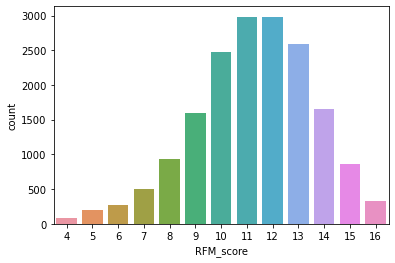

In [ ]:
sns.countplot(RFM_segment['RFM_score'])

Based on the plot, most users have low score between 10 and 13. While the amount of users with good score (6 and below) is very small. This indicates that the company is not performing well since in general the users have bad segment score. 

In [ ]:
print("Best Customers: ",len(RFM_segment[RFM_segment['RFM_segment']=='1111']))
print('Loyal Customers: ',len(RFM_segment[RFM_segment['F_score']==1]))
print("Big Spenders: ",len(RFM_segment[RFM_segment['M_score']==1]))
print('Lost Customers: ',len(RFM_segment[RFM_segment['RFM_segment']=='4444']))

Best Customers:  87
Loyal Customers:  1421
Big Spenders:  4366
Lost Customers:  323


In [ ]:
RFM_segment.describe()

user_id                      Recency     Frequency      Monetary  \
count   17463.000000                        17463  17463.000000  17463.000000   
mean   135718.863712  688 days 19:58:23.521731656      1.086354    276.381676   
std     79185.618598  462 days 06:41:08.242346496      0.299063    383.592673   
min        17.000000              0 days 00:00:00      1.000000      0.000000   
25%     67112.000000            293 days 00:00:00      1.000000     43.200000   
50%    134184.000000            629 days 00:00:00      1.000000    126.000000   
75%    203160.000000           1035 days 00:00:00      1.000000    338.280000   
max    296956.000000           1908 days 00:00:00      4.000000   4027.500000   

                            Length       R_score       F_score       M_score  \
count                        17463  17463.000000  17463.000000  17463.000000   
mean   100 days 14:15:11.595945714      2.498597      3.755884      2.500601   
std     58 days 05:54:31.621686840      1.118091      0.820240      1.118245   
min              -3 days +00:00:00      1.000000      1.000000      1.000000   
25%               50 days 00:00:00      1.000000      4.000000      1.500000   
50%              100 days 00:00:00      2.000000      4.000000      3.000000   
75%              151 days 00:00:00      3.000000      4.000000      4.000000   
max              205 days 00:00:00      4.000000      4.000000      4.000000   

            L_score     RFM_score  
count  17463.000000  17463.000000  
mean       2.506156     11.261238  
std        1.118996      2.302541  
min        1.000000      4.000000  
25%        2.000000     10.000000  
50%        3.000000     11.000000  
75%        4.000000     13.000000  
max        4.000000     16.000000

Quick overview:
* **Recency**: In general the Recency of the users are very bad since the Q1 of the recency is almost a year and the Q2 is almost 2 years. Furthermore the average user bought an item 2 years ago and has never made any purchase since.
* **Frequency**: The frequency of most users are also very bad as the Q1-Q3 is 1 transaction, which mean the majority of the users only made 1 transaction in the past 5 years.
* **Monetary**: The monetary is well distributed for the Q1-Q3, but it has extreme outliers that are more than 10x the value of Q3. 
* **Length**: The average age of an account is 100 days (From the day it was created until its last purchase). There seems to be anomaly as well since some account has negatie age, which means that the last purchase happens before the account was created. This is likely happen due to input errors, but we can ignore it for now since the difference is not that far from 0.

In [ ]:
RFM_segment['R_score'].value_counts()

1    4373
2    4369
3    4362
4    4359
Name: R_score, dtype: int64

The segment for R score are well distributed

In [ ]:
RFM_segment['F_score'].value_counts()

4    16042
1     1421
Name: F_score, dtype: int64

In [ ]:
RFM_segment['Frequency'].value_counts()

1    16042
2     1339
3       77
4        5
Name: Frequency, dtype: int64

In [ ]:
print("One time users: ", (16042/(16042+1412))*100)

One time users:  91.91016385928727


We can see that the majority of users (92%) only made 1 purchase and is scored as 4, any users that made more than 1 purchase are considered as rank 1.

In [ ]:
RFM_segment['M_score'].value_counts()

3    4370
4    4369
1    4366
2    4358
Name: M_score, dtype: int64

Despite the extreme outliers, since we are using Quartile to define the segment/score, the Monetary score is well distributed

In [ ]:
RFM_segment['L_score'].value_counts()

4    4421
2    4387
1    4329
3    4326
Name: L_score, dtype: int64

Length score are also well distributed

In [ ]:
RFM_segment['RFM_segment'].nunique()

126

As we can see that there are 126 unique segment, defining all the segment manually would take a lot of time and effort. Thus we will be using unsupervised machine learning to cluster the users with less number of segments.

## III.4. Preprocessing

In [ ]:
# making a segment only with user id table for later plot
segment_only = RFM_segment[['user_id','R_score','F_score','M_score','L_score']]
segment_only.rename({'R_score':'Recency','F_score':'Frequency','M_score':'Monetary','L_score':'Length'},axis=1,inplace=True)
segment_only

C:\Users\mahes\AppData\Local\Temp\ipykernel_15488\4214220893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_only.rename({'R_score':'Recency','F_score':'Frequency','M_score':'Monetary','L_score':'Length'},axis=1,inplace=True)


user_id  Recency  Frequency  Monetary  Length
0          17.0        4          4         2       3
1          25.0        4          4         4       3
2          63.0        4          4         1       2
3          65.0        4          4         3       3
4          69.0        4          4         4       1
...         ...      ...        ...       ...     ...
17458  295368.0        1          4         3       4
17459  296332.0        1          4         4       4
17460  296584.0        1          4         4       4
17461  296887.0        1          4         2       4
17462  296956.0        1          4         2       4

[17463 rows x 5 columns]

In [ ]:
df_preprocess = df_RFM.copy()
df_preprocess.drop('user_id',axis=1,inplace=True)
df_preprocess['Recency'] = df_preprocess['Recency'].dt.days
df_preprocess['Length'] = df_preprocess['Length'].dt.days
df_preprocess

Recency  Frequency  Monetary  Length
0         1836          1    243.00      83
1         1844          1      1.80      72
2         1793          1    585.00     117
3         1852          1     44.50      62
4         1760          1      9.42     165
...        ...        ...       ...     ...
17458        3          1     45.00      16
17459        6          1      4.65      10
17460        2          1      8.82      16
17461        6          1    144.00       9
17462        4          1    270.56       5

[17463 rows x 4 columns]

In [ ]:
df_preprocess.skew()

Recency      0.421688
Frequency    3.584792
Monetary     2.698717
Length       0.009375
dtype: float64

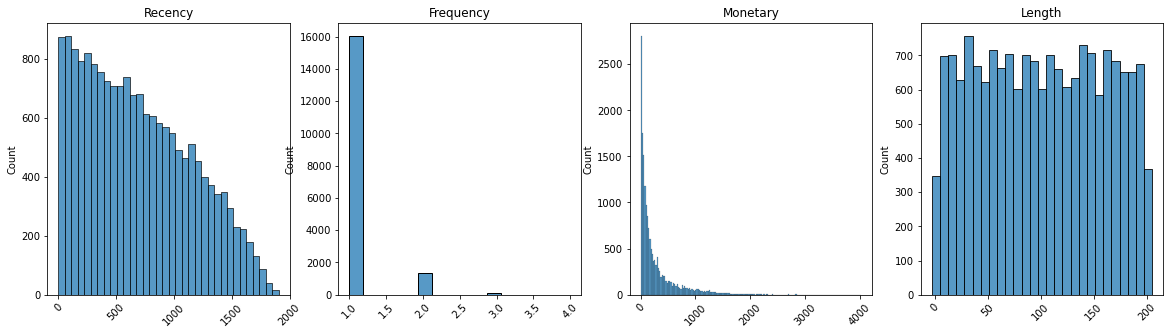

In [ ]:
plt.figure(figsize=(20,5))
for i,c in enumerate(df_preprocess):
    plt.subplot(1,4,i+1)
    sns.histplot(df_preprocess[c])
    plt.title(c)
    plt.xlabel('')
    plt.xticks(rotation=45)

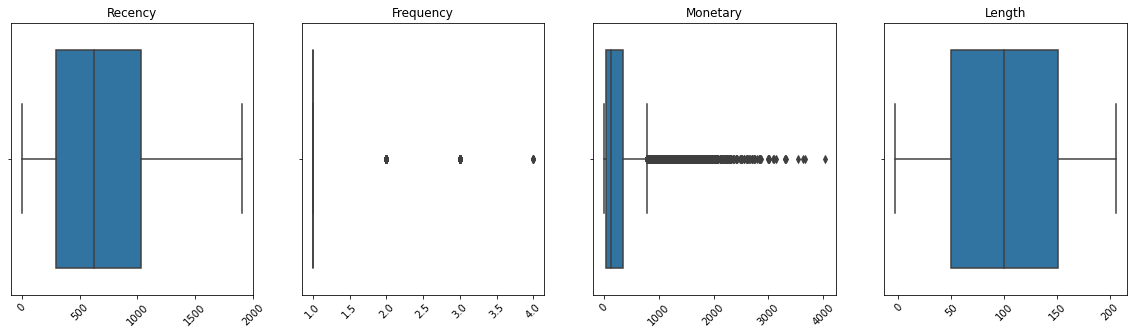

In [ ]:
plt.figure(figsize=(20,5))
for i,c in enumerate(df_preprocess):
    plt.subplot(1,4,i+1)
    sns.boxplot(df_preprocess[c])
    plt.title(c)
    plt.xlabel('')
    plt.xticks(rotation=45)

As we can see from skew, histplot, and boxplot both Frequency and Monetary are extremely skewed. Thus we will be handling these outliers using winsorizer.

### III.4.1. Outlier Handling

In [ ]:
# winsorizer
winsorizer = Winsorizer(capping_method='iqr',
                          tail='right', 
                          fold=1.5,
                          variables=['Monetary','Frequency'])

winsorizer.fit(df_preprocess)

df_win = winsorizer.transform(df_preprocess)                      

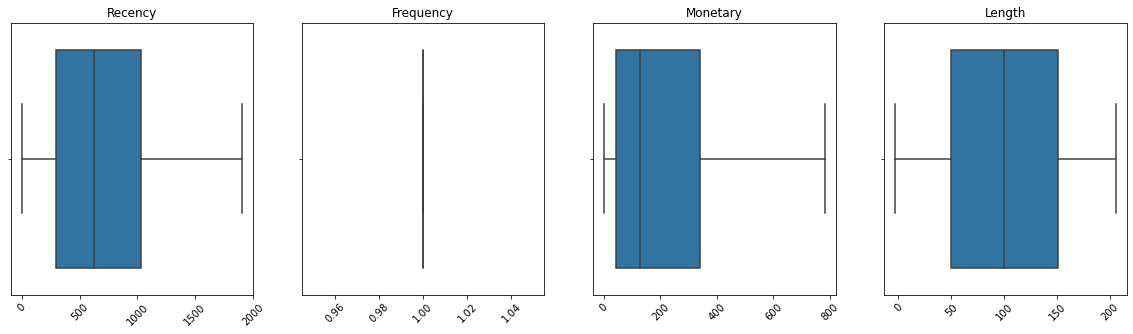

In [ ]:
plt.figure(figsize=(20,5))
for i,c in enumerate(df_win):
    plt.subplot(1,4,i+1)
    sns.boxplot(df_win[c])
    plt.title(c)
    plt.xlabel('')
    plt.xticks(rotation=45)

No more outliers

### III.4.2. Scaling

In [ ]:
scale = StandardScaler()

In [ ]:
df_scale = scale.fit_transform(df_win)

df_fin = pd.DataFrame()
df_fin['Recency'] = pd.DataFrame(df_scale[:,0])
df_fin['Frequency'] = pd.DataFrame(df_scale[:,1])
df_fin['Monetary'] = pd.DataFrame(df_scale[:,2])
df_fin['Length'] = pd.DataFrame(df_scale[:,3])


df_fin

Recency  Frequency  Monetary    Length
0      2.481622        0.0  0.041298 -0.302069
1      2.498928        0.0 -0.922969 -0.490928
2      2.388602        0.0  1.408543  0.281676
3      2.516234        0.0 -0.752263 -0.662618
4      2.317214        0.0 -0.892506  1.105788
...         ...        ...       ...       ...
17458 -1.483633        0.0 -0.750264 -1.452392
17459 -1.477143        0.0 -0.911575 -1.555406
17460 -1.485797        0.0 -0.894905 -1.452392
17461 -1.477143        0.0 -0.354483 -1.572575
17462 -1.481470        0.0  0.151477 -1.641251

[17463 rows x 4 columns]

### III.4.3. Concat

In [ ]:
df_use = df_fin.copy()

### III.4.4. PCA

In [ ]:
pca = PCA(n_components=2).fit(df_use)

In [ ]:
pca.explained_variance_ratio_

array([0.35589124, 0.32823754])

In [ ]:
df_pca = pca.transform(df_use)

## III.5. Modelling

### III.5.1. K means

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=99).fit(df_fin)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(df_use, model.labels_)
                     for model in kmeans_per_k[1:]]

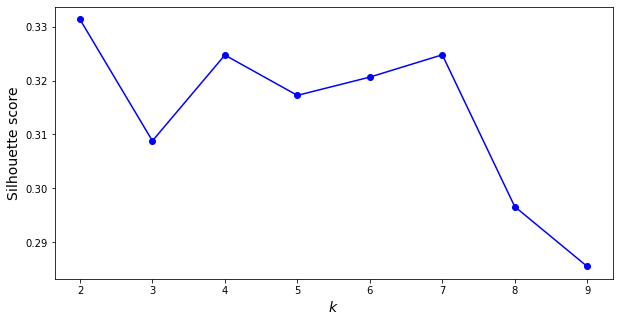

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

Based on the silhouette score, k = 4 and 7 are the optimal cluster. But 7 cluster might be too much segmentation for this dataset.

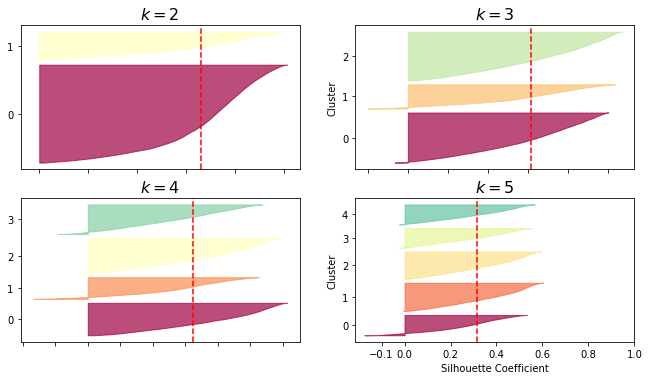

In [ ]:
plt.figure(figsize=(11, 9))

for k in (2,3,4,5):
    plt.subplot(3,2,k-1)

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(df_use, y_pred)

    padding = len(df_use) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = pl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
        facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel('Cluster')
    if k in (5,10):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)

plt.show()

Based on the silhouette visualization, we should be able to find the best k value by considering the following:
* All cluster are above the red line
* Minimal tail are better
* Same size cluster are better

Based on that, cluster 4 and 5 are a good option

In [ ]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df_use) 
    kmeanModel.fit(df_use)     
      
    distortions.append(sum(np.min(cdist(df_use, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_use.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df_use, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df_use.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

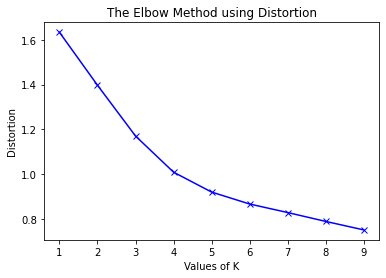

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

Based on the distortion, the best elbow would be from k = 4 or 5

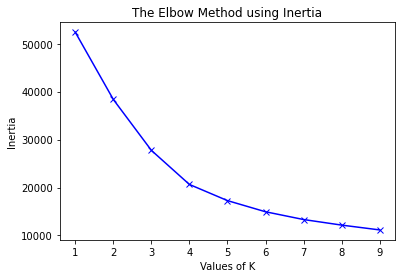

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Similar with distortion, the best elbow would be from k = 4 or 5

Overall, The best clustering would come from 4 cluster

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

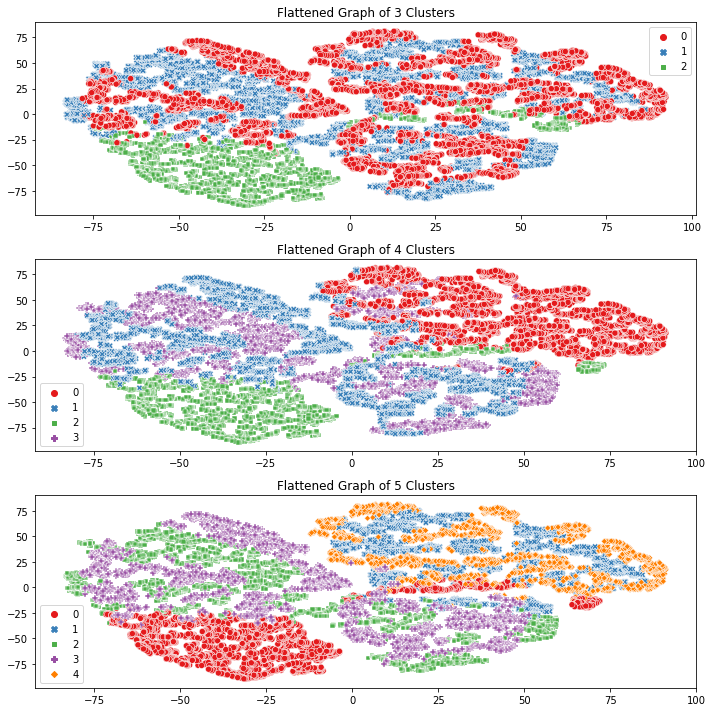

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(df_use, 3, df_preprocess)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(df_use, 4, df_preprocess)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(df_use, 5, df_preprocess)

plt.tight_layout()
# plt.savefig('flattened.png', format='png', dpi=1000)

* 3 cluster can't seems to differentiate between 0 and 1. Only cluster lable 2 correctly
* 4 cluster able to correctly lable 0 and 2. Lable 1 and 3 is a bit mixed
* 5 cluster can only lable 0 correctly, 1 and 4 are mixed, 2 and 3 are mixed

In [ ]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df_RFM.index, 
                                       columns=df_RFM.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['user_id', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary','Length'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

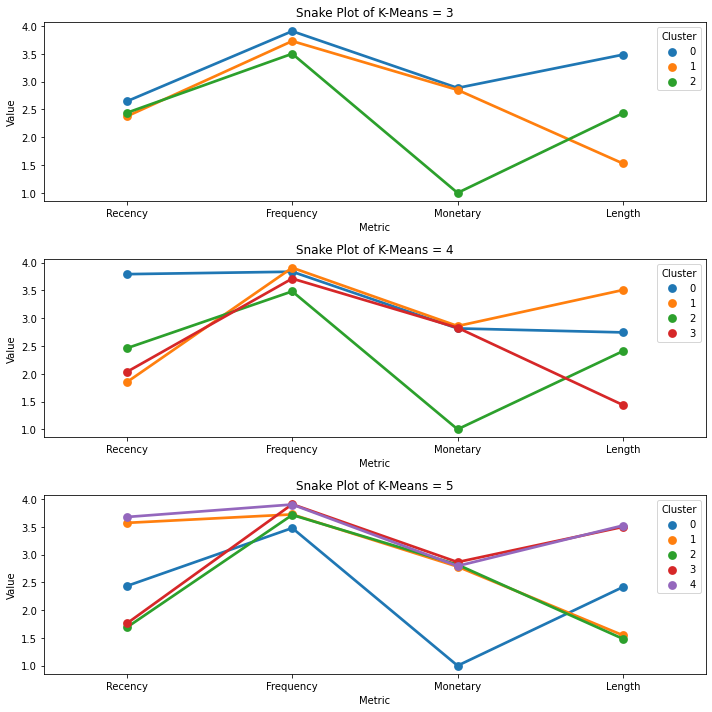

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(segment_only, df_rfm_k3) 

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(segment_only, df_rfm_k4)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(segment_only, df_rfm_k5)

plt.tight_layout()

Based on the sanke plot for K means 4 cluster has the best result on differentiating the clusters

### III.5.2. Gaussian Mixture Full

In [ ]:
def gaussian_full(normalised_df_rfm, clusters_number, original_df_rfm):
    
    gaussian = GaussianMixture(n_components = clusters_number, covariance_type='full')
    gaussian.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = gaussian.predict(normalised_df_rfm)
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

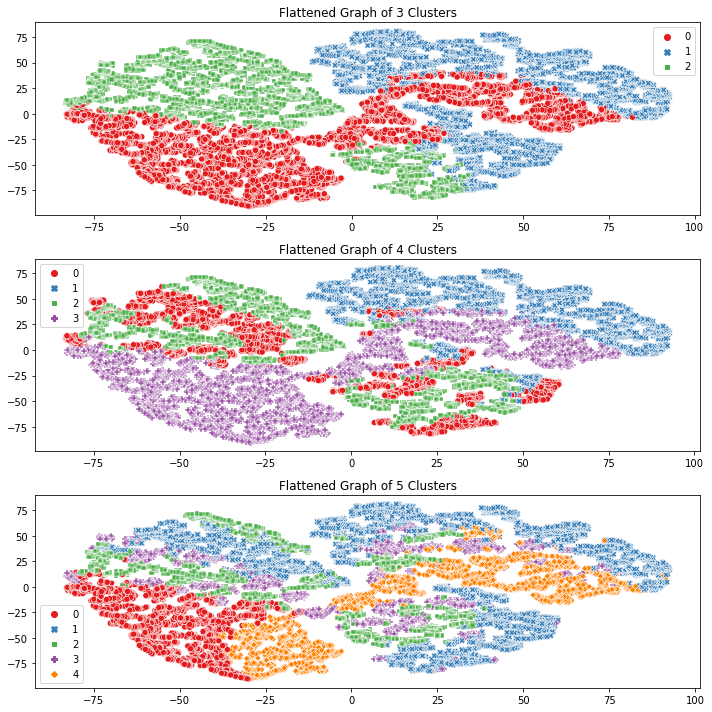

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = gaussian_full(df_use, 3, df_preprocess)

plt.subplot(3, 1, 2)
df_rfm_k4 = gaussian_full(df_use, 4, df_preprocess)

plt.subplot(3, 1, 3)
df_rfm_k5 = gaussian_full(df_use, 5, df_preprocess)

plt.tight_layout()
# plt.savefig('flattened.png', format='png', dpi=1000)

Based on the plot, the model is has better clustering at 3 cluster

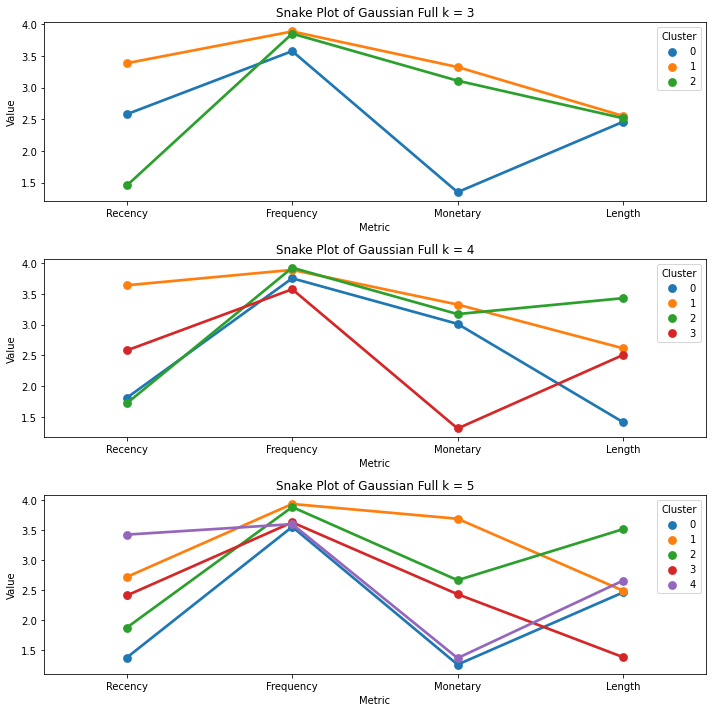

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of Gaussian Full k = 3')
snake_plot(segment_only, df_rfm_k3) 

plt.subplot(3, 1, 2)
plt.title('Snake Plot of Gaussian Full k = 4')
snake_plot(segment_only, df_rfm_k4)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of Gaussian Full k = 5')
snake_plot(segment_only, df_rfm_k5)

plt.tight_layout()

But based on the sanke plot, the model cant differentiate the length of a users. Thus based on the snake plot 4 cluster is better since the model can differentiate the recency and length better

### III.5.3. Gaussian Mixture Spherical

In [ ]:
def gaussian_sphere(normalised_df_rfm, clusters_number, original_df_rfm):
    
    gaussian = GaussianMixture(n_components = clusters_number, covariance_type='spherical')
    gaussian.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = gaussian.predict(normalised_df_rfm)
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

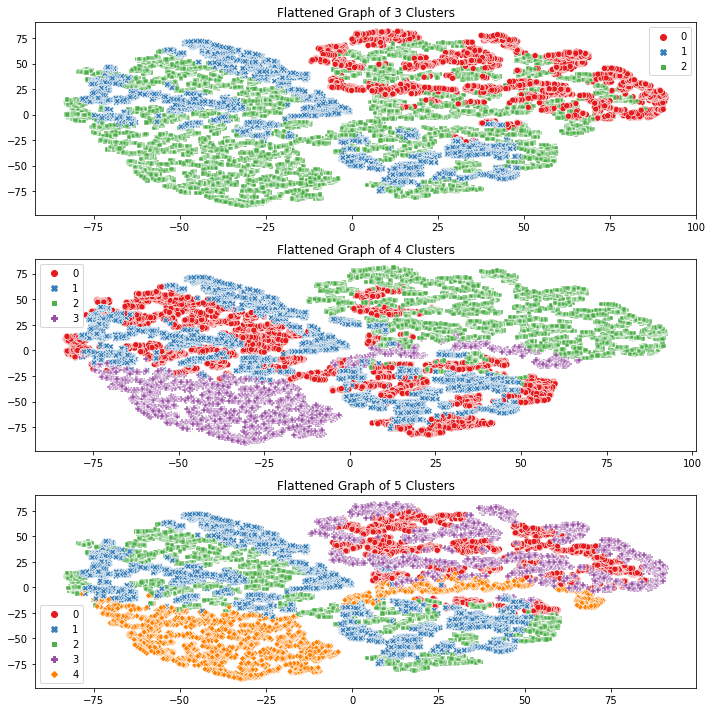

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = gaussian_sphere(df_use, 3, df_preprocess)

plt.subplot(3, 1, 2)
df_rfm_k4 = gaussian_sphere(df_use, 4, df_preprocess)

plt.subplot(3, 1, 3)
df_rfm_k5 = gaussian_sphere(df_use, 5, df_preprocess)

plt.tight_layout()
# plt.savefig('flattened.png', format='png', dpi=1000)

Based on the plot for gaussian mixture spherical the best cluster are 4 clusters

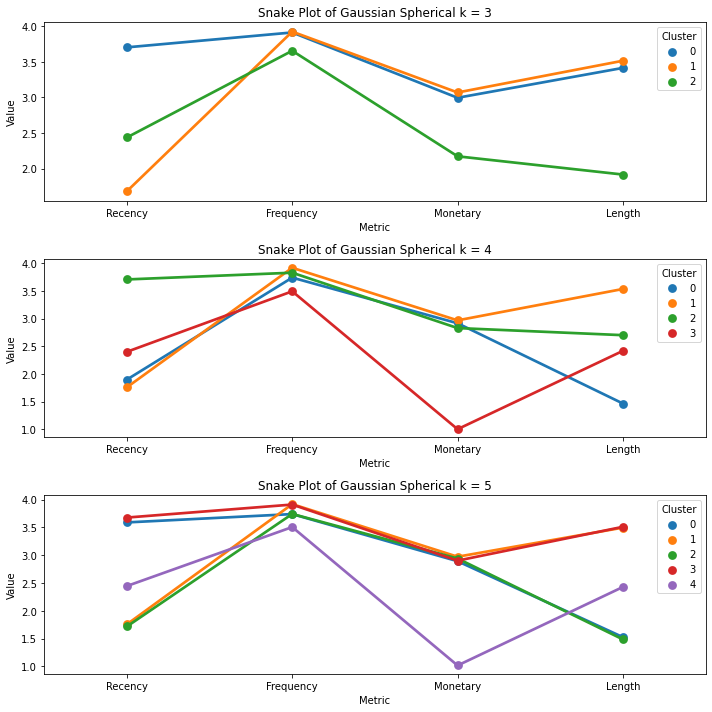

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of Gaussian Spherical k = 3')
snake_plot(segment_only, df_rfm_k3) 

plt.subplot(3, 1, 2)
plt.title('Snake Plot of Gaussian Spherical k = 4')
snake_plot(segment_only, df_rfm_k4)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of Gaussian Spherical k = 5')
snake_plot(segment_only, df_rfm_k5)

plt.tight_layout()

The snakeplot also shows that 4 cluster has the best differentiating cluster compared to 3 and 5 clusters.

### III.5.4. Gaussian Mixture Tied

In [ ]:
def gaussian_tied(normalised_df_rfm, clusters_number, original_df_rfm):
    
    gaussian = GaussianMixture(n_components = clusters_number, covariance_type='tied')
    gaussian.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = gaussian.predict(normalised_df_rfm)
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

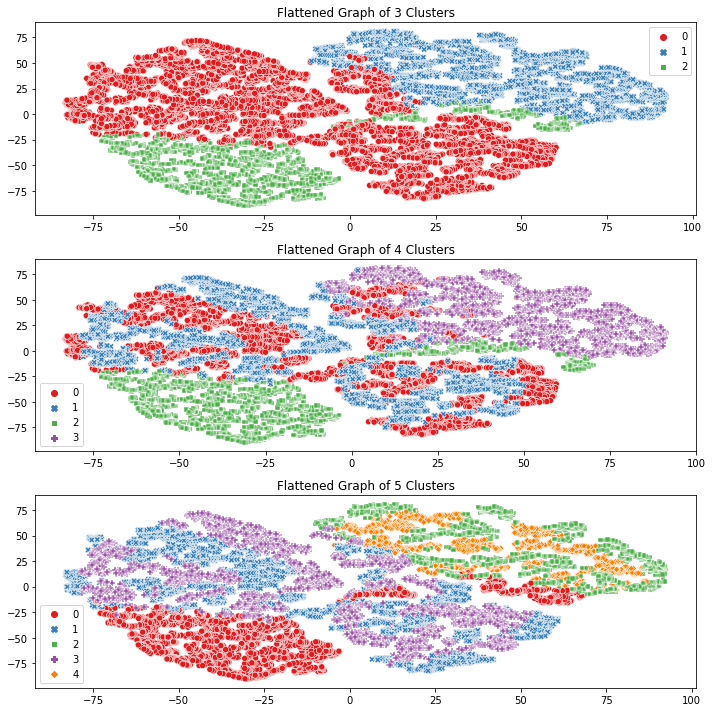

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = gaussian_tied(df_use, 3, df_preprocess)

plt.subplot(3, 1, 2)
df_rfm_k4 = gaussian_tied(df_use, 4, df_preprocess)

plt.subplot(3, 1, 3)
df_rfm_k5 = gaussian_tied(df_use, 5, df_preprocess)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

Gaussian tied has a very good cluster result with 3 cluster based on the plot.

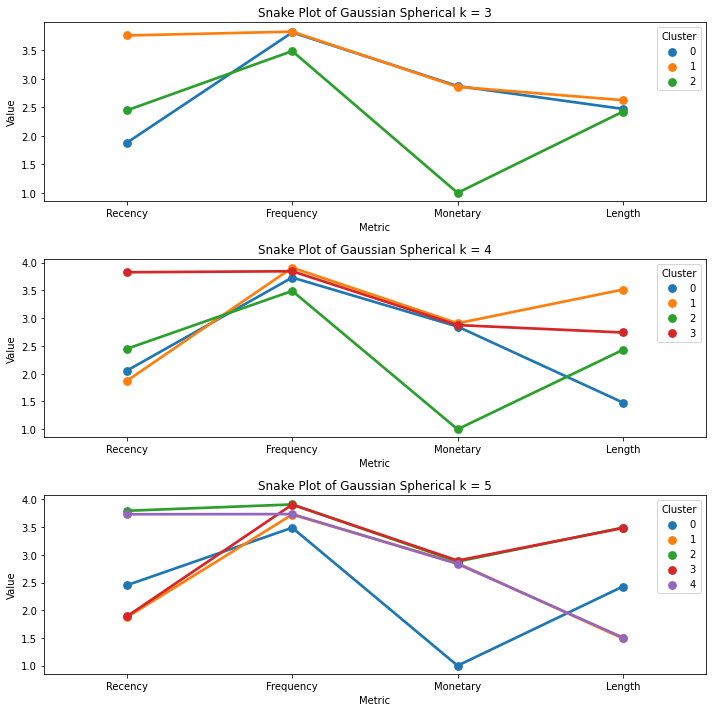

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of Gaussian Spherical k = 3')
snake_plot(segment_only, df_rfm_k3) 

plt.subplot(3, 1, 2)
plt.title('Snake Plot of Gaussian Spherical k = 4')
snake_plot(segment_only, df_rfm_k4)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of Gaussian Spherical k = 5')
snake_plot(segment_only, df_rfm_k5)

plt.tight_layout()

But again based on the snakeplot 3 cluster can't differentiate between the length of a customer.

### III.5.5. Spectral Clustering

In [ ]:
def spectral(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = SpectralClustering(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

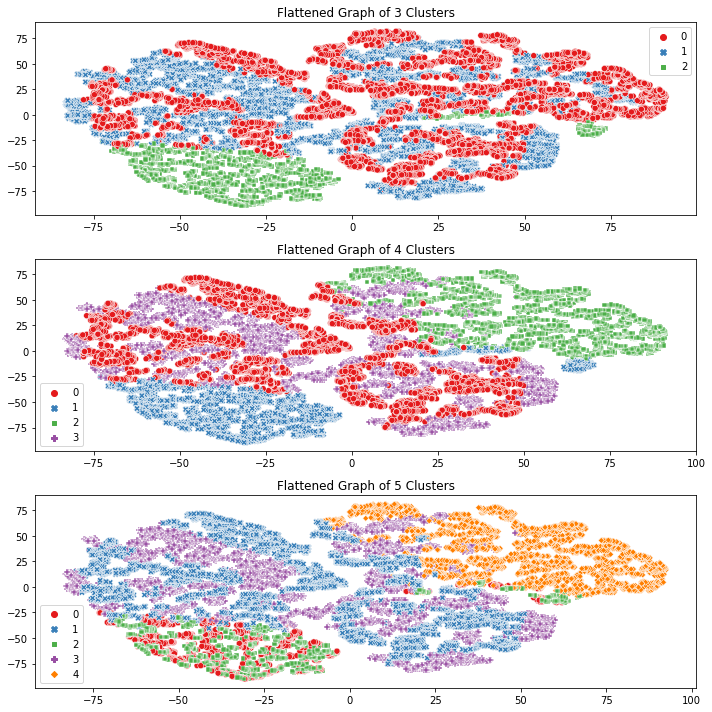

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = spectral(df_use, 3, df_preprocess)

plt.subplot(3, 1, 2)
df_rfm_k4 = spectral(df_use, 4, df_preprocess)

plt.subplot(3, 1, 3)
df_rfm_k5 = spectral(df_use, 5, df_preprocess)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

Based on the plot the best cluster for spectral clustering is 4 cluster.

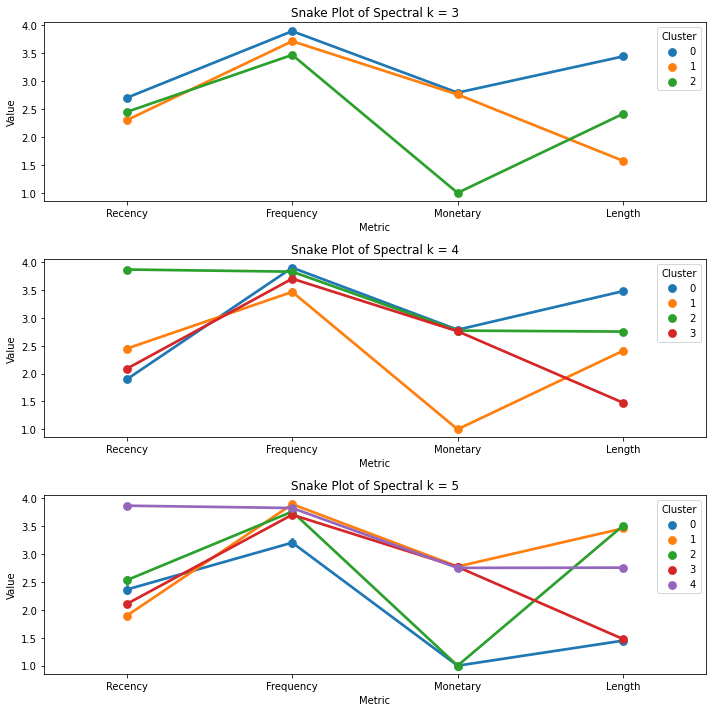

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of Spectral k = 3')
snake_plot(segment_only, df_rfm_k3) 

plt.subplot(3, 1, 2)
plt.title('Snake Plot of Spectral k = 4')
snake_plot(segment_only, df_rfm_k4)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of Spectral k = 5')
snake_plot(segment_only, df_rfm_k5)

plt.tight_layout()

Based on the snake plot, the model does have a better results at clustering with 4 cluster as tit can differentiate both recency and length.

Overall, we found that the majority of the models perform best with 4 cluster. But oerall K-means with 4 cluster is the better option (by a slight margin) compared to the other model as most of them performs similarly with 4 clusters.

## III.6. Best Model

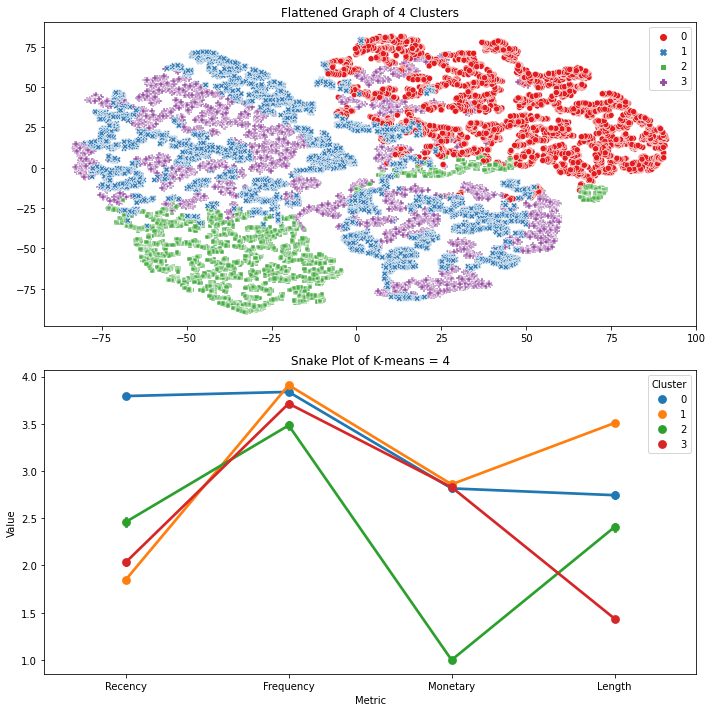

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
df_rfm_best = kmeans(df_use, 4, df_preprocess)

plt.subplot(2, 1, 2)
plt.title('Snake Plot of K-means = 4')
snake_plot(segment_only, df_rfm_best)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

Overall this is our best clustering model. This model can distincly differentiate cluster 0 and 2, while the differentiating factor of cluster 1 and 3 is the length (how long the accoun has been active for).

K means 4:
* 0. Hybernating: Low score (close to 4) on all features except length (indicates old user that has been inactive)
* 1. New Customer: Recent purchase, lowest frequency, lowest spending, shortest account time
* 2. Potential Loyalist: Good recency, best frequency, high spenders, decent length
* 3. Loyal Customer: Longest user with recent purchase, decent frequency and decent spending

## III.7. Conclusion

In this chapter we have achieved our goal of clustering the customer of this company. This success is achieved by the following:

RFM is done by grouping and agregating features to make new relevant RFM features
* Recency is obtained by looking at the latest transaction, and we found out that the average user made last transaction around 2 years ago.
* Frequency is obtained by counting the invoice/orders of a user, and we found that 92% of users is a one time buyer.
* Monetary is obtained by summing the price of items a user bought, the average spending is 270$, but there are extreme cases when an user spent a total of 4027 USD.
* Length is obtained by looking the length between latest transaction and the creation date of an account (user_id), and the average active time of an account is 100 days.
* Based on the cumulative RFM score, most of the users resides between score 10-13, and are more densed in lower score 14-16. Users with good sores of 4-6 is a very small fragment of the total users.
* Due to manual segmentation, there are around 126 unique segment which will be hard to define what each cluster represent.

Modeling:
* 3 Models were used in this notebook which are K-means Clustering, Gaussian Mixutre (Full, Spherical, and Tied), and Spectral Clustering
* Most model performs similarly with 4 cluster as their best cluster
* Overall K-means has the better result slightly compared to the other algorithm.
* The 4 clusters are Hybernating, New Users, Potential Loyalist, and Loyal User.
* 0. Hybernating: old user that has been inactive
* 1. New Customer: Recent purchase, and new account
* 2. Potential Loyalist: Good recency, best frequency, high spenders, decent length
* 3. Loyal Customer: longest active time with recent purchase, decent frequency and decent spending

Based on the statistics it the best cluster is 4 with k-means algorithm. That does not mean we cannot use other cluster number or algorithm, because in the end the decision will be up to the company on how they want to segment the customer and act on it. This is merely our recommendation on how to proceed with the data we have.

**Recommendation**

Perhaps in the future clustering using different feature that has not been grouped or agregated would leads to a new insights. Trying out other type of model could perhaps give a better clustering results.

# IV. Sales Forecasting

## IV.1. Import Libraries 

These are libraries that are used in this assignment:

- pandas : Used to load and process data

- numpy : Used to do mathematical calculation necessary in the data analysis

- matplotlib : Used to visualize data

- seaborn : Used to do an alternative data visualization

- statsmodels : Used to determine the stationarity of the time series data

- pmdarima : used to perform arima time series modeling

- warnings : Used to ignore any warning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import warnings

warnings.simplefilter('ignore')

# enable inline plotting
%matplotlib inline

sns.set_style(style='white')

# set the max columns to none
pd.set_option('display.max_columns', None)

## IV.2. Data Loading 

We have been provided with 5 datasets . The description for what the dataset contain is given below: 


1. **df_orders.csv** : This dataset contains information of each orders happens in since 2013 until 2018

In [ ]:
# Loading data
df_orders = pd.read_csv('data/orders/dsv1069_orders.csv')

In [ ]:
df_orders.head()

invoice_id  line_item_id   user_id  item_id  \
0    192320.0       83118.0  178481.0   3526.0   
1    192320.0      207309.0  178481.0   1514.0   
2    192320.0      392027.0  178481.0   3712.0   
3     80902.0      243831.0  154133.0   3586.0   
4     80902.0      399806.0  154133.0   1061.0   

                           item_name item_category  price          created_at  \
0                  digital apparatus     apparatus  330.0 2017-06-28 21:14:25   
1        miniature apparatus cleaner     apparatus   99.0 2017-06-28 21:14:25   
2        miniature apparatus cleaner     apparatus   99.0 2017-06-28 21:14:25   
3              reflective instrument    instrument   57.2 2016-10-09 06:57:30   
4  extra-strength instrument charger    instrument   17.6 2016-10-09 06:57:30   

               paid_at    month     date  
0  2017-06-27 21:19:39  2017-06  2017-06  
1  2017-06-27 21:19:39  2017-06  2017-06  
2  2017-06-27 21:19:39  2017-06  2017-06  
3  2016-10-07 10:08:10  2016-10  2016-10  
4  2016-10-07 10:08:10  2016-10  2016-10

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47402 entries, 0 to 47401
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   invoice_id     47402 non-null  float64       
 1   line_item_id   47402 non-null  float64       
 2   user_id        47402 non-null  float64       
 3   item_id        47402 non-null  float64       
 4   item_name      47402 non-null  object        
 5   item_category  47402 non-null  object        
 6   price          47402 non-null  float64       
 7   created_at     47402 non-null  datetime64[ns]
 8   paid_at        47402 non-null  object        
 9   month          47402 non-null  period[M]     
 10  date           47402 non-null  period[M]     
dtypes: datetime64[ns](1), float64(5), object(3), period[M](2)
memory usage: 4.0+ MB


This dataset has 47302 rows and 10 columns, with no null values

### Changing data type

`created_at` : object -> datetime


In [ ]:
df_orders['created_at'] =  pd.to_datetime(df_orders['created_at'])

In [ ]:
df_orders['date'] = df_orders['created_at'].dt.to_period('M')


In [ ]:
df_orders.head()

invoice_id  line_item_id   user_id  item_id  \
0    192320.0       83118.0  178481.0   3526.0   
1    192320.0      207309.0  178481.0   1514.0   
2    192320.0      392027.0  178481.0   3712.0   
3     80902.0      243831.0  154133.0   3586.0   
4     80902.0      399806.0  154133.0   1061.0   

                           item_name item_category  price          created_at  \
0                  digital apparatus     apparatus  330.0 2017-06-28 21:14:25   
1        miniature apparatus cleaner     apparatus   99.0 2017-06-28 21:14:25   
2        miniature apparatus cleaner     apparatus   99.0 2017-06-28 21:14:25   
3              reflective instrument    instrument   57.2 2016-10-09 06:57:30   
4  extra-strength instrument charger    instrument   17.6 2016-10-09 06:57:30   

               paid_at    month     date  
0  2017-06-27 21:19:39  2017-06  2017-06  
1  2017-06-27 21:19:39  2017-06  2017-06  
2  2017-06-27 21:19:39  2017-06  2017-06  
3  2016-10-07 10:08:10  2016-10  2016-10  
4  2016-10-07 10:08:10  2016-10  2016-10

### Grouping dataset
we will group our dataset according to column `date` and `category`


In [ ]:
df_ts = df_orders.groupby(['date', 'item_category']).agg(count=('invoice_id', 'count'), sum=('price', 'sum'))
df_ts

count     sum
date    item_category               
2013-03 contraption        2  387.50
        instrument         1   48.40
        mechanism          3   64.50
2013-04 instrument         6  459.80
        mechanism          5   69.60
...                      ...     ...
2018-06 instrument         2   48.40
        mechanism          7   75.75
        module             5  474.00
        tool               4   81.50
        widget             4    8.82

[627 rows x 2 columns]

#### Create a dictionary to be filled with time series dataframe of each category


In [ ]:
dictio = {}
categories = df_orders['item_category'].unique()
for cat in categories:
    dictio[cat] = df_ts.loc[(slice(None), cat), :][-54:-1].reset_index(0).reset_index(drop=True)
    
    
    

## IV.3. EDA (Exploratory Data Analysis)

In [ ]:
# define a function to plot the time series data
def plot(dictionary, feature, vert_line=None, length=16, width=5):
    fig, axes = plt.subplots(len(feature), 1, figsize=(length, width))
    for c, ax in zip(feature, axes):        
        
        # check the stationary of each time series data
        result = adfuller(dictio[c]['count'].values)        
        if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
            result_stationary = 'stationary'
        else:
            result_stationary = 'non-stationary'
        
        
        # plotting the quantity and sales of each time series data
        _ = sns.lineplot(x=dictionary[c]['date'].astype(str), y=dictionary[c]['count'], color='blue', ax=ax)
        g = sns.lineplot(x=dictionary[c]['date'].astype(str), y=dictionary[c]['sum'], color='green', ax=_.axes.twinx())
        ax.tick_params(axis='x', rotation=60)
        ax.set_title(f'{c} - {result_stationary}')
        if vert_line:
            plt.axvline(vert_line, color='red')
        else:
            pass
        _.legend(handles=[Line2D([], [], marker='_', color="b", label='count'), Line2D([], [], marker='_', color="g", label='sales')])
        
        
        
    plt.tight_layout()

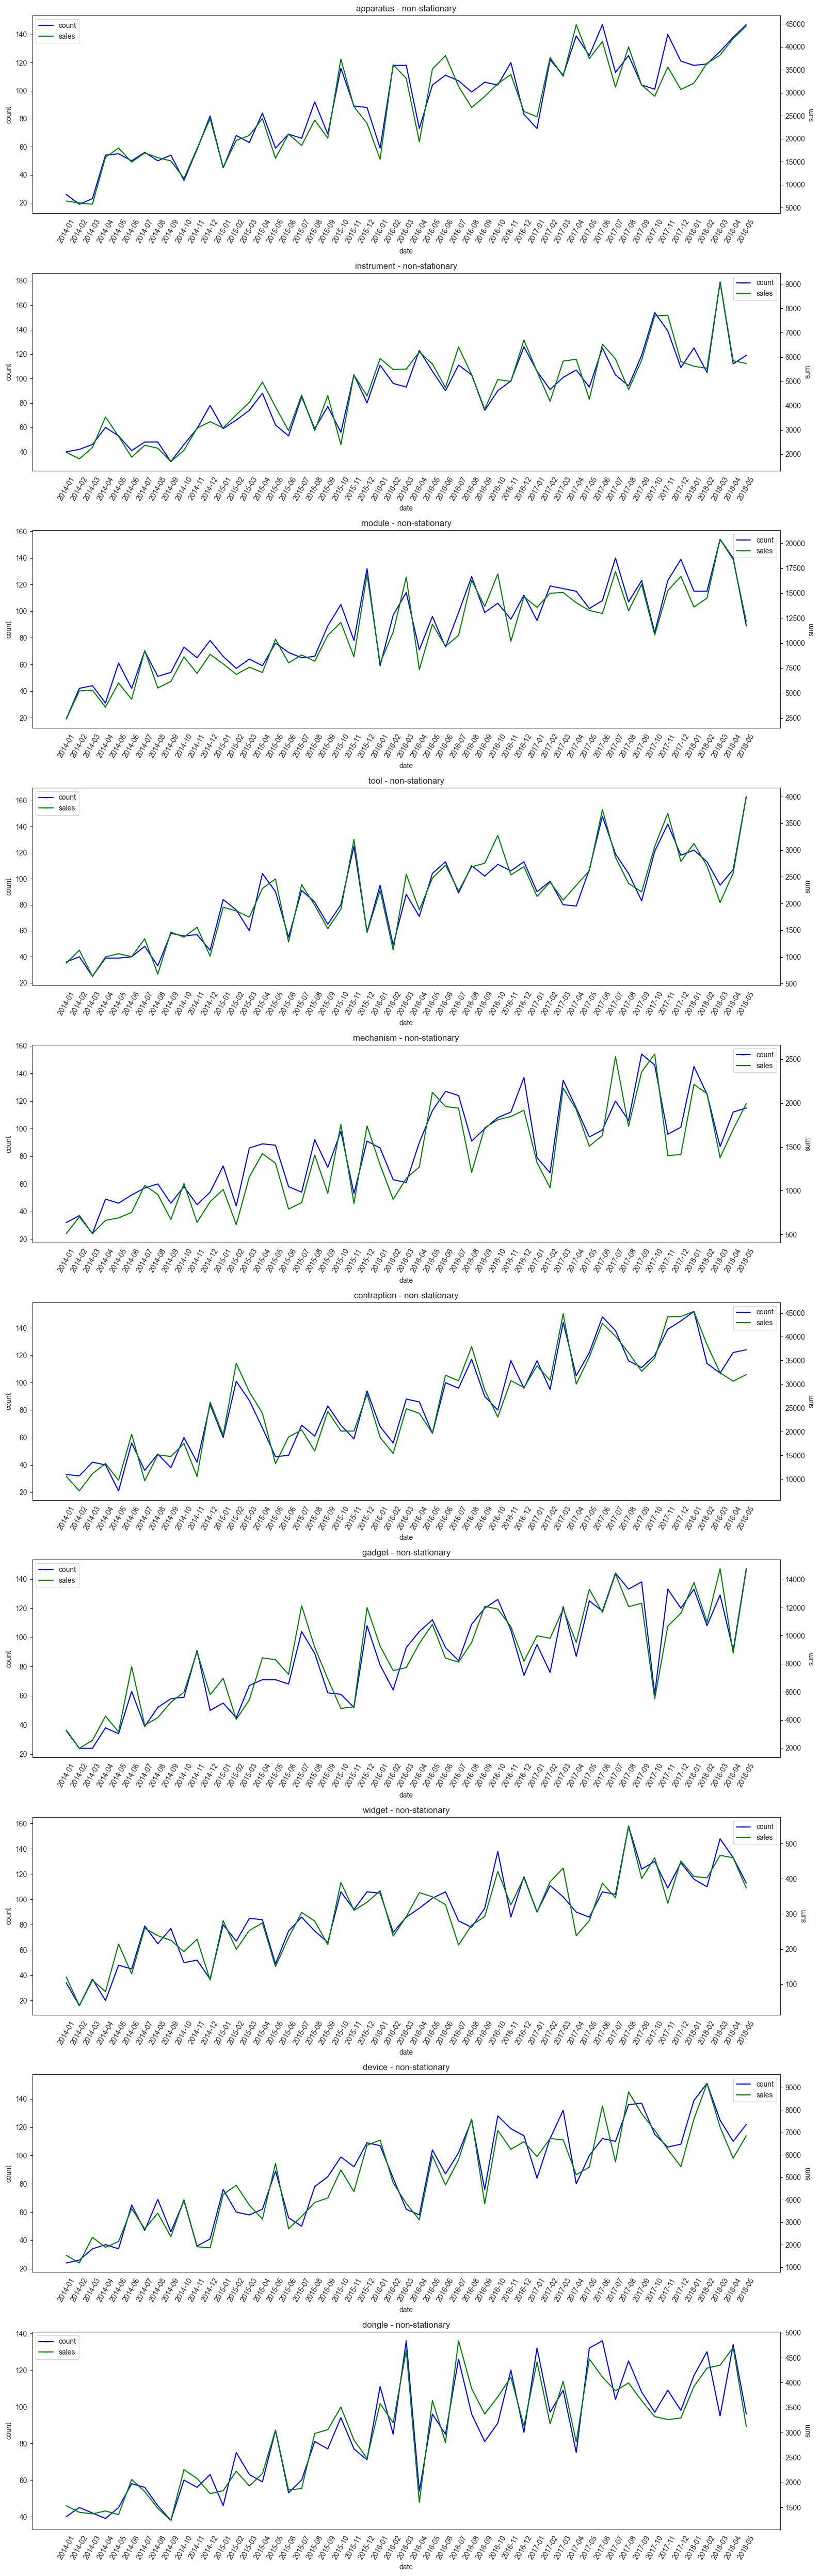

In [ ]:
plot(dictio, categories, width=50)

From the figure above, we can observe that:
- All of the time series data are non-stationary, meaning that there is somekind of trend and seasonality in the data
- It seems that quantity and sales are closely correlated
- Almost all of the time series data have a increase spike in month 11 and 12 in each years  

## IV.4. Modelling

We will use ARIMA for the time series prediction

### IV.4.1. Model Training

#### Count

In [ ]:
# create a dictionary to be input by all of the ARIMA models
dictio_model_count = {}
for cat in categories:
    dictio_model_count[cat] = auto_arima(dictio[cat]['count'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=12, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)
    
    

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=394.025, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=379.639, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=380.172, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=387.710, Time=0.06 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=379.452, Time=0.12 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=380.793, Time=0.05 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=0.98 sec
 AR

#### Sales

In [ ]:
dictio_model_sales = {}
for cat in categories:
    dictio_model_sales[cat] = auto_arima(dictio[cat]['sum'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=12, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)
    
    

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=859.294, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=843.174, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=851.201, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=840.432, Time=0.12 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=841.946, Time=0.22 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=841.992, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=840.628, Time=0.09 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=843.940, Time=0.33 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=843.727, Time=0.08 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=837.143, Time=0.12 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=838.513, Time=0.06 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=838.688, Time=0.27 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=838.725, Time=0.25 sec
 ARIMA(2,1,0)(1,1,1)[12]             

### IV.4.2. Prediction

In [ ]:
# Create date for the predicted month
index_new = pd.date_range('2018-06', periods=7, freq='M').to_period('M')
index_new

PeriodIndex(['2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
             '2018-12'],
            dtype='period[M]')

In [ ]:
# create a dictionary to contain the prediction and the data
dictio_result = {}
for cat in categories:
    prediction = pd.DataFrame(index_new, columns=['date'])
    prediction['count'] = np.round(dictio_model_count[cat].predict(n_periods=7).reset_index(drop=True))
    prediction['sum'] = dictio_model_sales[cat].predict(n_periods=7).reset_index(drop=True)
    
    dictio_result[cat] = pd.concat([dictio[cat], prediction], ignore_index=True)
    
    

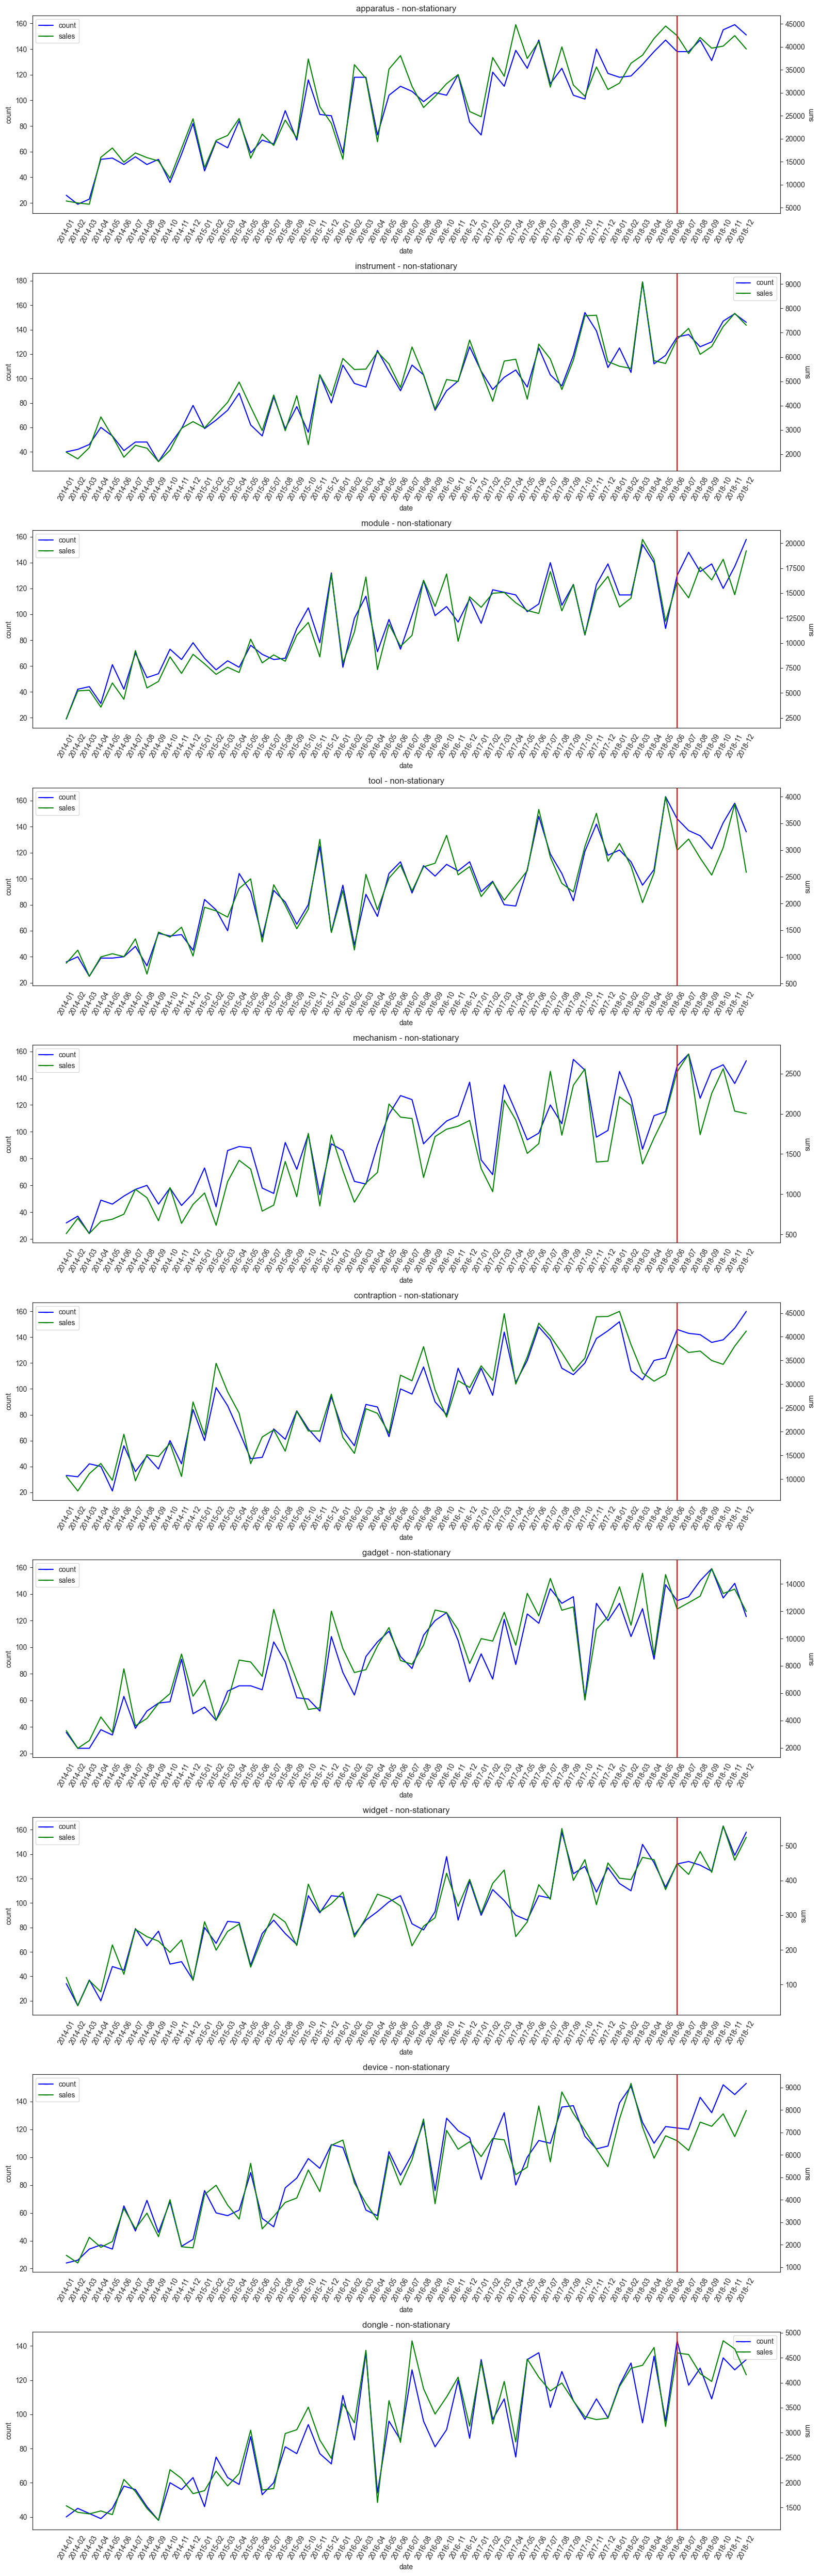

In [ ]:
plot(dictio_result, categories, vert_line=53, width=50)

## IV.5. Conclusion

Based on the figure above, we can see that:
- apparatus, contraption and widget will have an increase for the next 6 months
- tools, mechanism and dongle will have a decrease for the next 6 months